## Final Project Submission

Please fill out:
* Student name: Paul Narducci
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: Jeff Herman
* Blog post URL:

## Project Question

* How can I use tweets in order to determine sentiment direted at specific products?

## Introduction

Over the past decade social media has become a major platform for all forms of industries due to how easily a business can interact with their consumer base. One of the biggest social media platforms - Twitter - allows for quick and direct communication with the consumer. However, a business cannot always respond to every tweet, and may be unable to correctly identify how the majority or minority group of consumers is feeling about their product. NLP streamlines this process by allowing data scientists to take these tweets, process them, vectorize them, and build models around them in order to determine sentiment.

In my project, I will be producing a training model using tweets directed at Apple, Google, and Android in order to create a model that can accurately identify sentiment within the tweet. The scores that I will be mainly focusing on ar the f1 score (due to imbalances within the data set) and the recall score. The recall score is being used in order to determine if my model can accurately identify the true negative sentiments in the tweets. I think this is important because a business is always aiming to acquire customer retention, and if the needs of those who are not satisfied with the product are not met, then a business will lose out on potential lifetime consumers.

### Import Data

In [44]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import functions for tweet cleaning
from tweet_cleaner import tweet_text_cleaner
from brand_selector import brand_selection

# Import libraries for EDA 
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk import FreqDist

# Import libraries for vectorizing tweets
import itertools
import collections
import scattertext as st
import swifter
import spacy
from collections import Counter
from tqdm import tqdm 
tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import LabeledSentence

# Import libraries for model creation and summaries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Doc2Vec
from sklearn import preprocessing 
from imblearn.over_sampling import SMOTE, SMOTENC, BorderlineSMOTE, SVMSMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour, EditedNearestNeighbours, NeighbourhoodCleaningRule, TomekLinks
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report, roc_curve, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from cf_matrix import make_confusion_matrix

In [2]:
#Import CSV file containing the tweet text, the product that the sentiment is directed at, and the sentiment
nlp_df = pd.read_csv('judge_tweet.csv')

#Rename column names in order to make data easily readable
nlp_df = nlp_df.rename(columns={'emotion_in_tweet_is_directed_at':'brand', 
                                'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment'})
nlp_df.head(60)

,tweet_text,brand,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


Great! I can cearly see a twitter users tweet, what product the tweet was directed at, and the meotion that the twitter user conveyed when they tweeted about the product. I also notice that there are missing values, emotions that require a sentiment, and tweets that need to be cleaned in order to properly run my sentiment.

### Data Cleaning

In [3]:
#Take a look at the datas info
nlp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_text  9092 non-null   object
 1   brand       3291 non-null   object
 2   sentiment   9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


I can clearly see that the product column contains a lot of missing values. In order to replace these values, I will look for product and brand mentions in the tweets in order to fill these missing values. I can also see that one tweet is missing from the dataset. I am going to drop that row completely from my data.

In [4]:
#Drop the one missing tweet from the dataframe
nlp_df = nlp_df.dropna(subset=['tweet_text']) 
nlp_df.head(10)

,tweet_text,brand,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
10,Excited to meet the @samsungmobileus at #sxsw ...,Android,Positive emotion


In [5]:
nlp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9092 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_text  9092 non-null   object
 1   brand       3291 non-null   object
 2   sentiment   9092 non-null   object
dtypes: object(3)
memory usage: 284.1+ KB


Great! Now I need to start looking at the value counts of the product and sentiment columns before I fill in the missing values for product. It's possible that I may be able to combine certain products or create a neutral emotion label. Let's take a look

In [6]:
#Let's look at the vaue counts of sentiment first
nlp_df['sentiment'].value_counts()

No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: sentiment, dtype: int64

In [7]:
#Now, let's assign the I can't tell and No emotion towards brand or product to Neutral emotion
nlp_df['sentiment'] = nlp_df['sentiment'].replace('No emotion toward brand or product', 'neutral').replace("I can't tell", 'neutral').replace('Positive emotion', 'positive').replace("Negative emotion", 'negative')
nlp_df['sentiment'].value_counts()

neutral     5544
positive    2978
negative     570
Name: sentiment, dtype: int64

In [8]:
#Now, I will look at the value counts for products and brand
nlp_df['brand'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: brand, dtype: int64

In [9]:
#In order to make our data more precise, I am going to replace all the products listed with their brand label
nlp_df['brand'] = nlp_df['brand'].replace('iPad', 'Apple').replace('iPad or iPhone App', 'Apple').replace('iPhone', 'Apple').replace('Other Apple product or service', 'Apple'). replace('Other Google product or service', 'Google').replace('Android App', 'Android')
nlp_df['brand'].value_counts()

Apple      2409
Google      723
Android     159
Name: brand, dtype: int64

However, before I look through the tweets in order to replace the missing product values I will first need to clean the tweets. In order to do this I am going to apply a function I created called text_cleaner. The code and information about how it works can be found in the text_cleaner.py file found in the repo.

Our character length is off because of inconsitencies in the data due to how the tweets are being read. We will use tweet_text_length to gaudge the cleanliness of our tweets after running them through the tweet_text_cleaner function. 

In [10]:
nlp_df['tweet_text'] = nlp_df['tweet_text'].map(tweet_text_cleaner)
nlp_df['tweet_text']

0        i have a iphone after hours tweeting at austi...
1        know about awesome ipadiphone app that youll ...
2        can not wait for also they should sale them d...
3        i hope this years festival is not as crashy a...
4        great stuff on friday marissa mayer google ti...
                              ...                        
9088                          ipad everyoure welcomehere 
9089    wave buzz we interrupt your regularly schedule...
9090    googles zeiger a physician never reported pote...
9091    some verizon iphone customers complained their...
9092                      google tests checkin offers at 
Name: tweet_text, Length: 9092, dtype: object

Now that all the tweets have been cleaned, I will now fill the product columns using my brand_selector function. This is done by looking at the tweets and determining if the product or brand is mentioned in the tweet. 

In [11]:
nlp_df['brand'] = nlp_df['tweet_text'].map(brand_selection)

It worked, but I still need to clean-up the product column a bit more. I'm going to first replace the None columns with NaN values. Then I'm going to drop these columns since I can't determine what brand the tweets are referencing. Finally, I'm going to make the brand names lowercase in order to keep consistency within the data.

In [12]:
#Replace None string with NaN value
nlp_df['brand'] = nlp_df['brand'].replace('None', np.NaN)

#Drop rows with undetermined product
nlp_df = nlp_df.dropna(subset=['brand'])

#lowercase brand column
nlp_df['brand'] = nlp_df['brand'].str.lower()

print(nlp_df.info())
print(nlp_df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7305 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_text  7305 non-null   object
 1   brand       7305 non-null   object
 2   sentiment   7305 non-null   object
dtypes: object(3)
memory usage: 228.3+ KB
None
                                          tweet_text   brand sentiment
0   i have a iphone after hours tweeting at austi...   apple  negative
1   know about awesome ipadiphone app that youll ...   apple  positive
3   i hope this years festival is not as crashy a...   apple  negative
4   great stuff on friday marissa mayer google ti...  google  positive
5   new ipad apps for and communication are showc...   apple   neutral


Great! All the columns have been processed and all unidentifiable rows have been removed from the data. Now I will create some visualizations in order to make some deductions about the data.

### EDA

#### Bar Charts

I have created various bar charts in order to visualize tweets by sentiment, products and product based on sentiments. Let's explore each one.

* The first count plot shows how many tweets fall into what sentiment. As can be seen, majority of the tweets (roughly 4,000) are labeled as neutral, followed by positive (about 2,500), and finally negative (roughly 500). 

* The second count plot shows how many tweets are directed at a particular brand. According to the plot, roughly 5,000 tweets are directed towards Apple, 2,000 towards Google, and roughly 300 directed at Android.

* The final plot takes the brand and maps the sentiment over it, thus breaking each brand into three sepearate counts. It can be seen that all the brands have way more positive and neutral sentiment towards them than negative. Its also very clear that majority of the tweets were directed specifically at Apple and its product at this event.

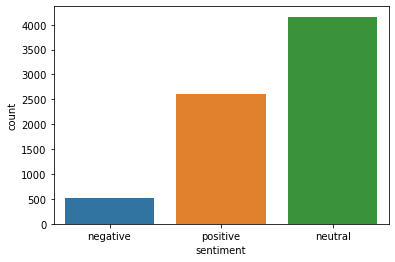

In [13]:
sns.countplot(x=nlp_df['sentiment'], data=nlp_df['sentiment']);

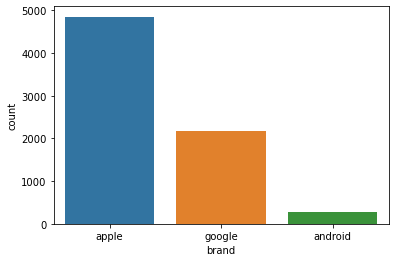

In [14]:
sns.countplot(x=nlp_df['brand'], data=nlp_df['brand']);

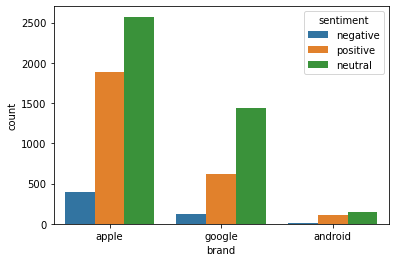

In [15]:
sns.countplot(x=nlp_df['brand'], hue=nlp_df['sentiment'], data=nlp_df['sentiment']);

#### Word Clouds

Word clouds are not an effective means of finding meaningful data, but they can be useful with regards to speculation as to why a term may be appearing more frequently than another term. 

* I will take a look at the negative word cloud firest. I can see that there is a lot of negative sentiment directed at Apples' ipad and ipohine products over google and android products. I can also see negative sentiment tied heavily to words such as design headaches, app, people, time, Apple store, product, and day. This leads me to believe that people may have been frustrated with Apple at this event over changes in product design.

* The positive word cloud also has soe isnights, such as a lot of entiment being directed at the ipad, and words such as thank, great, love, and free are also clearly seen.

* As for the neutral word cloud, there is a lot of neutral sentiment directed at Google, the ipad, and Austin (where the event took place). Most neutral words seem to be directed at technological terms or items, and places and events.

However, one should always take word clouds with a grain of salt.There are many reasons as to why those terms may be more popular than others. In general they may just appear more in the tweets without a particular sentiment directed at them.

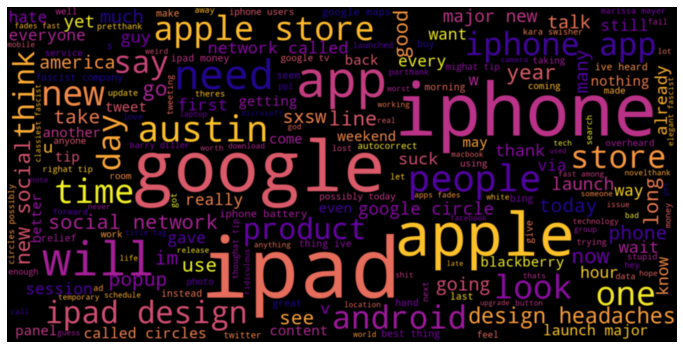

In [16]:
neg_tweets = nlp_df[nlp_df.sentiment == 'negative']
neg_string = []
for t in neg_tweets.tweet_text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')


wordcloud = WordCloud(width=1600, height=800, max_font_size=200, colormap='plasma').generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bicubic")
plt.axis("off")
plt.show()

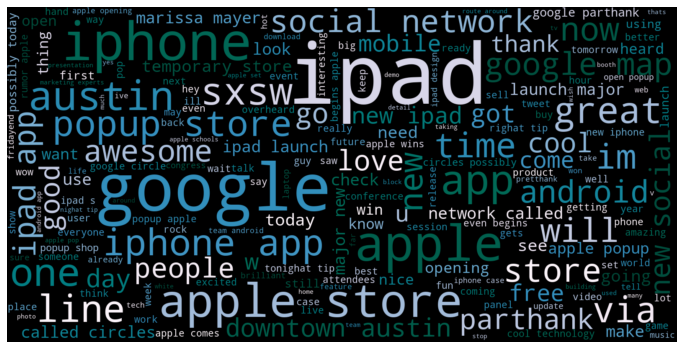

In [17]:
pos_tweets = nlp_df[nlp_df.sentiment == 'positive']
pos_string = []
for t in pos_tweets.tweet_text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')


wordcloud = WordCloud(width=1600, height=800, max_font_size=200, colormap='PuBuGn').generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

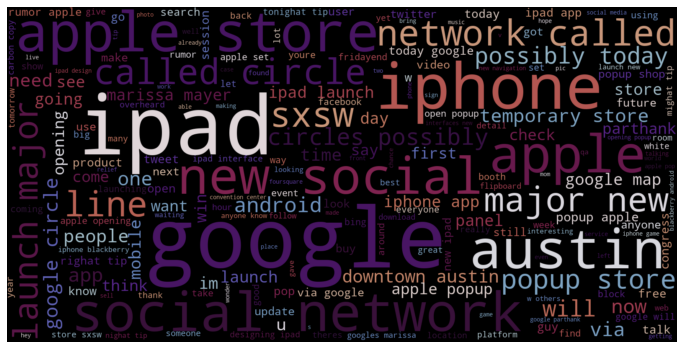

In [18]:
neu_tweets = nlp_df[nlp_df.sentiment == 'neutral']
neu_string = []
for t in neu_tweets.tweet_text:
    neu_string.append(t)
neu_string = pd.Series(neu_string).str.cat(sep=' ')


wordcloud = WordCloud(width=1600, height=800, max_font_size=200, colormap='twilight').generate(neu_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Word Frequency 

Next, I took a look at word frequency. I did this by tokenizing my tweets using word tokenizer from the nltk library. I then removed the stop words (words like a or and that form links between more unique words in a senctence), and then lemmatized the words to their root terms so that words do not repeat. Appear processing my tokenized words, I I used FreqDist on a list of al the tweets in order to get the frequency of each word throughout all the tweets, and then printed the 20 most common words. As can be seen in the table below, generic terms such as the brand or product take the top spot. They are very few unique sentiment words here that provide actual value from this list. I can clearly see words such as new, and get, but this doesn't really tell me much about the sentiment. Below I created various barplots based on sentiments and the words found within those tweets.

In [19]:
# List of tokenized words
tweet_tokens = nlp_df['tweet_text'].apply(word_tokenize)

# Remove stop words from setences
stop_words = set(stopwords.words('english')) 
tweet_tokens = tweet_tokens.map(lambda x: [item for item in x if item not in stop_words])

# Lemmatize words 
lemmatizer = WordNetLemmatizer()
tweet_tokens = tweet_tokens.map(lambda x: [lemmatizer.lemmatize(w) for w in x])

In [20]:
# Created a flat list of all words
tweet_tokens_list = list(itertools.chain(*tweet_tokens))

# Create dataframe of 15 most common words
tweet_freq = FreqDist(tweet_tokens_list)
common_tweets = pd.DataFrame(tweet_freq.most_common(20),
                             columns=['total_words', 'total_count'])

common_tweets

,total_words,total_count
0,ipad,2353
1,google,2278
2,apple,1889
3,store,1308
4,iphone,1258
5,new,912
6,austin,715
7,launch,617
8,app,601
9,social,562


<AxesSubplot:xlabel='total_words', ylabel='total_count'>

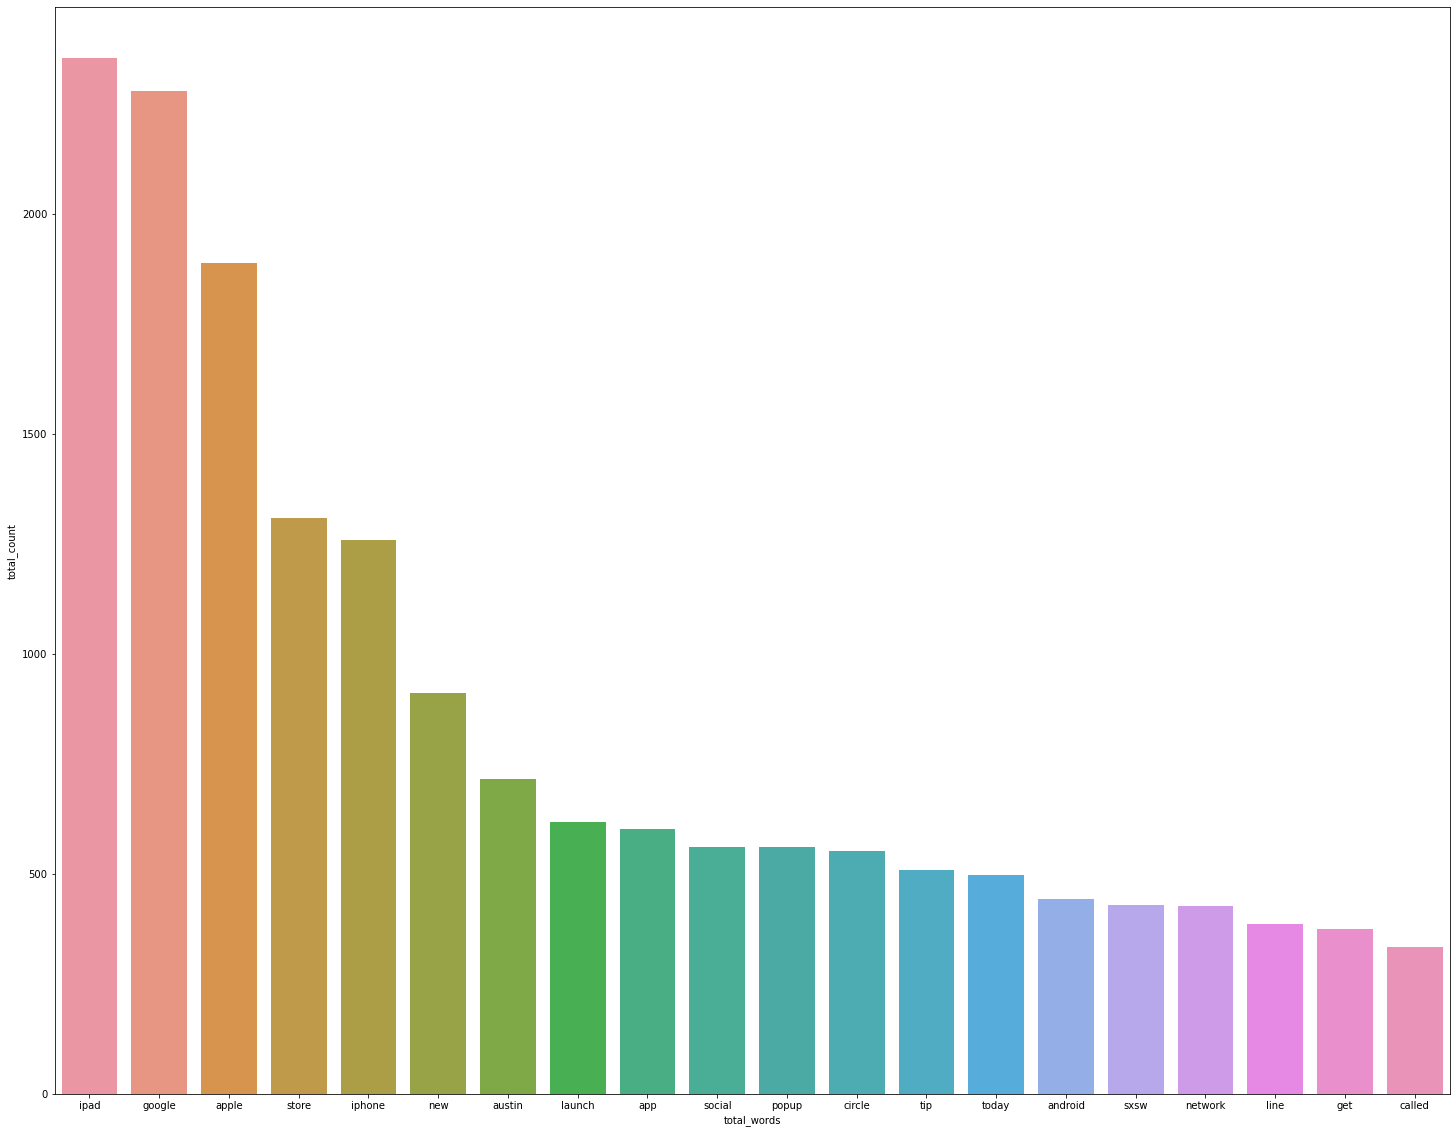

In [21]:
plt.figure(figsize=(25,20))
sns.barplot(x=common_tweets['total_words'], y=common_tweets['total_count'])

In [22]:
# Find most common words in negative tweets
neg_tweet_tokens = neg_tweets['tweet_text'].apply(word_tokenize)
 
neg_tweet_tokens = neg_tweet_tokens.map(lambda x: [item for item in x if item not in stop_words])

neg_tweet_tokens = neg_tweet_tokens.map(lambda x: [lemmatizer.lemmatize(w) for w in x])

neg_tweet_tokens_list = list(itertools.chain(*neg_tweet_tokens))

neg_tweet_freq = FreqDist(neg_tweet_tokens_list)
neg_common_tweets = pd.DataFrame(neg_tweet_freq.most_common(20),
                             columns=['neg_words', 'neg_count'])

neg_common_tweets

,neg_words,neg_count
0,ipad,173
1,iphone,144
2,google,135
3,apple,101
4,app,54
5,store,42
6,like,41
7,new,39
8,need,33
9,tip,31


<AxesSubplot:xlabel='neg_words', ylabel='neg_count'>

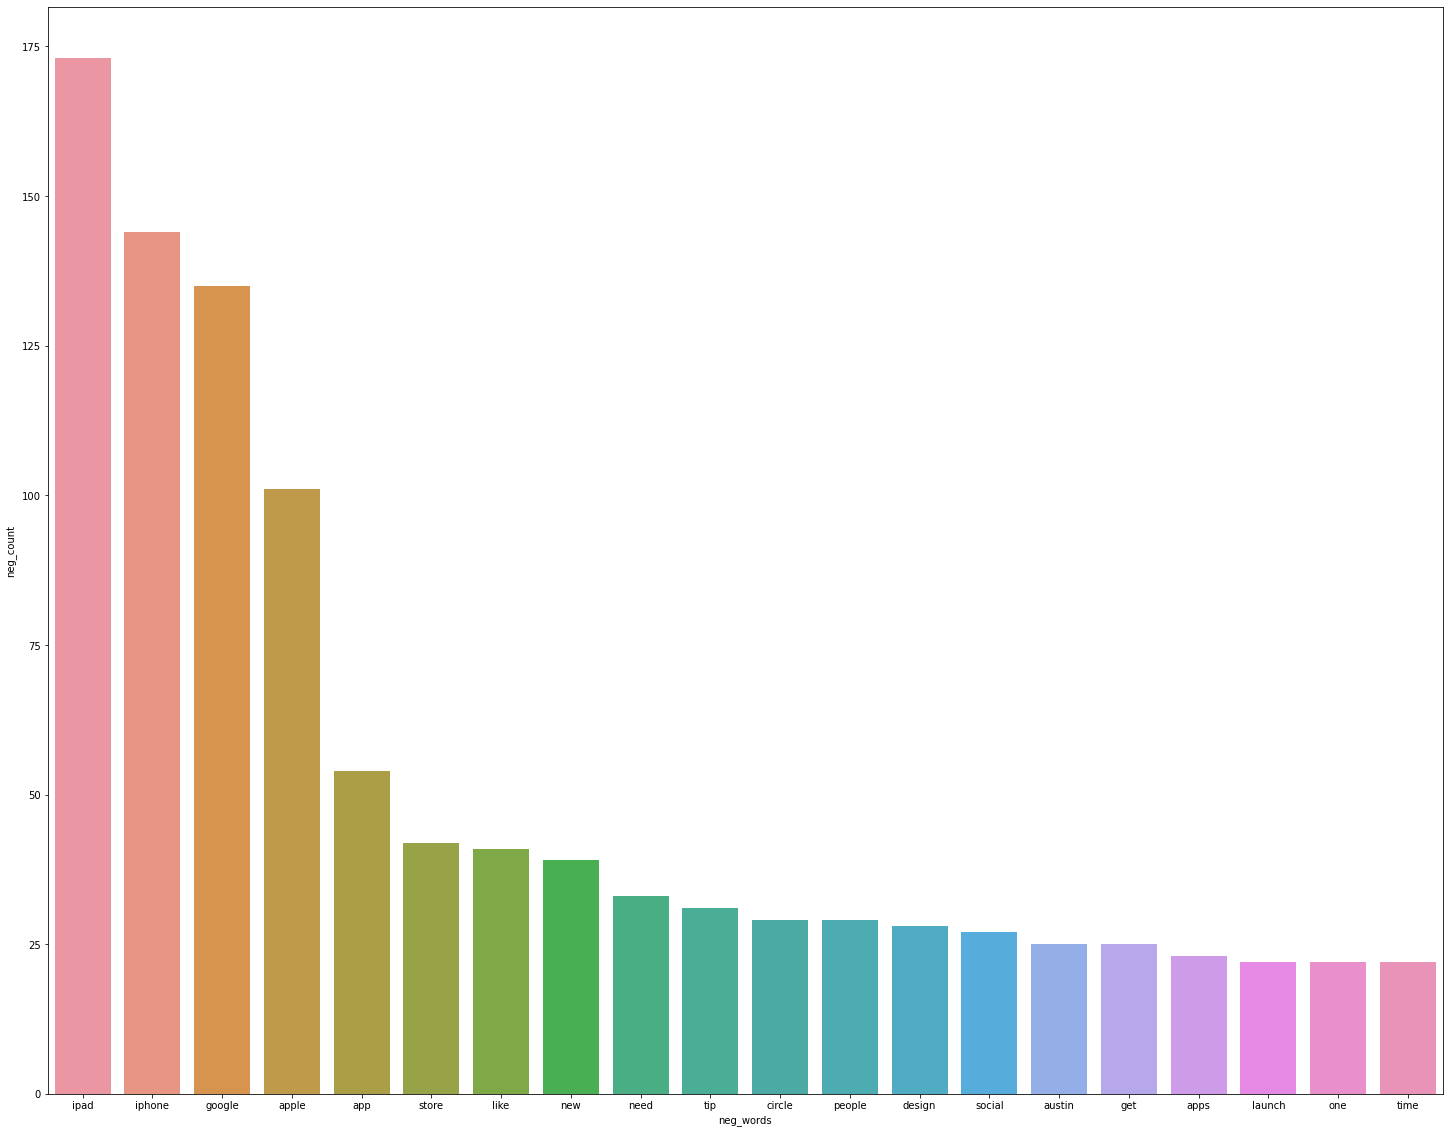

In [23]:
plt.figure(figsize=(25,20))
sns.barplot(x=neg_common_tweets['neg_words'], y=neg_common_tweets['neg_count'])

The negative word frequency data shares a lot of words in common with the generalized list. I can see that there is a lot of negative sentiment directed at Apple and Apple products, as well as Google. I can also see negative sentiment directed at new, like, and need, words where sentiment can change based on perspective. I can also see negative sentiment directed at words such as design, people, and time. Clearly there are hints as to why these words may be a part of negative sentiment, but there is no substantial evidence as to why that is.

In [24]:
# find most common words in negative tweets
pos_tweet_tokens = pos_tweets['tweet_text'].apply(word_tokenize)
 
pos_tweet_tokens = pos_tweet_tokens.map(lambda x: [item for item in x if item not in stop_words])

pos_tweet_tokens = pos_tweet_tokens.map(lambda x: [lemmatizer.lemmatize(w) for w in x])

pos_tweet_tokens_list = list(itertools.chain(*pos_tweet_tokens))

pos_tweet_freq = FreqDist(pos_tweet_tokens_list)
pos_common_tweets = pd.DataFrame(pos_tweet_freq.most_common(20),
                             columns=['pos_words', 'pos_count'])

pos_common_tweets

,pos_words,pos_count
0,ipad,993
1,apple,746
2,google,647
3,store,479
4,iphone,443
5,new,317
6,app,315
7,austin,229
8,popup,205
9,tip,187


<AxesSubplot:xlabel='pos_words', ylabel='pos_count'>

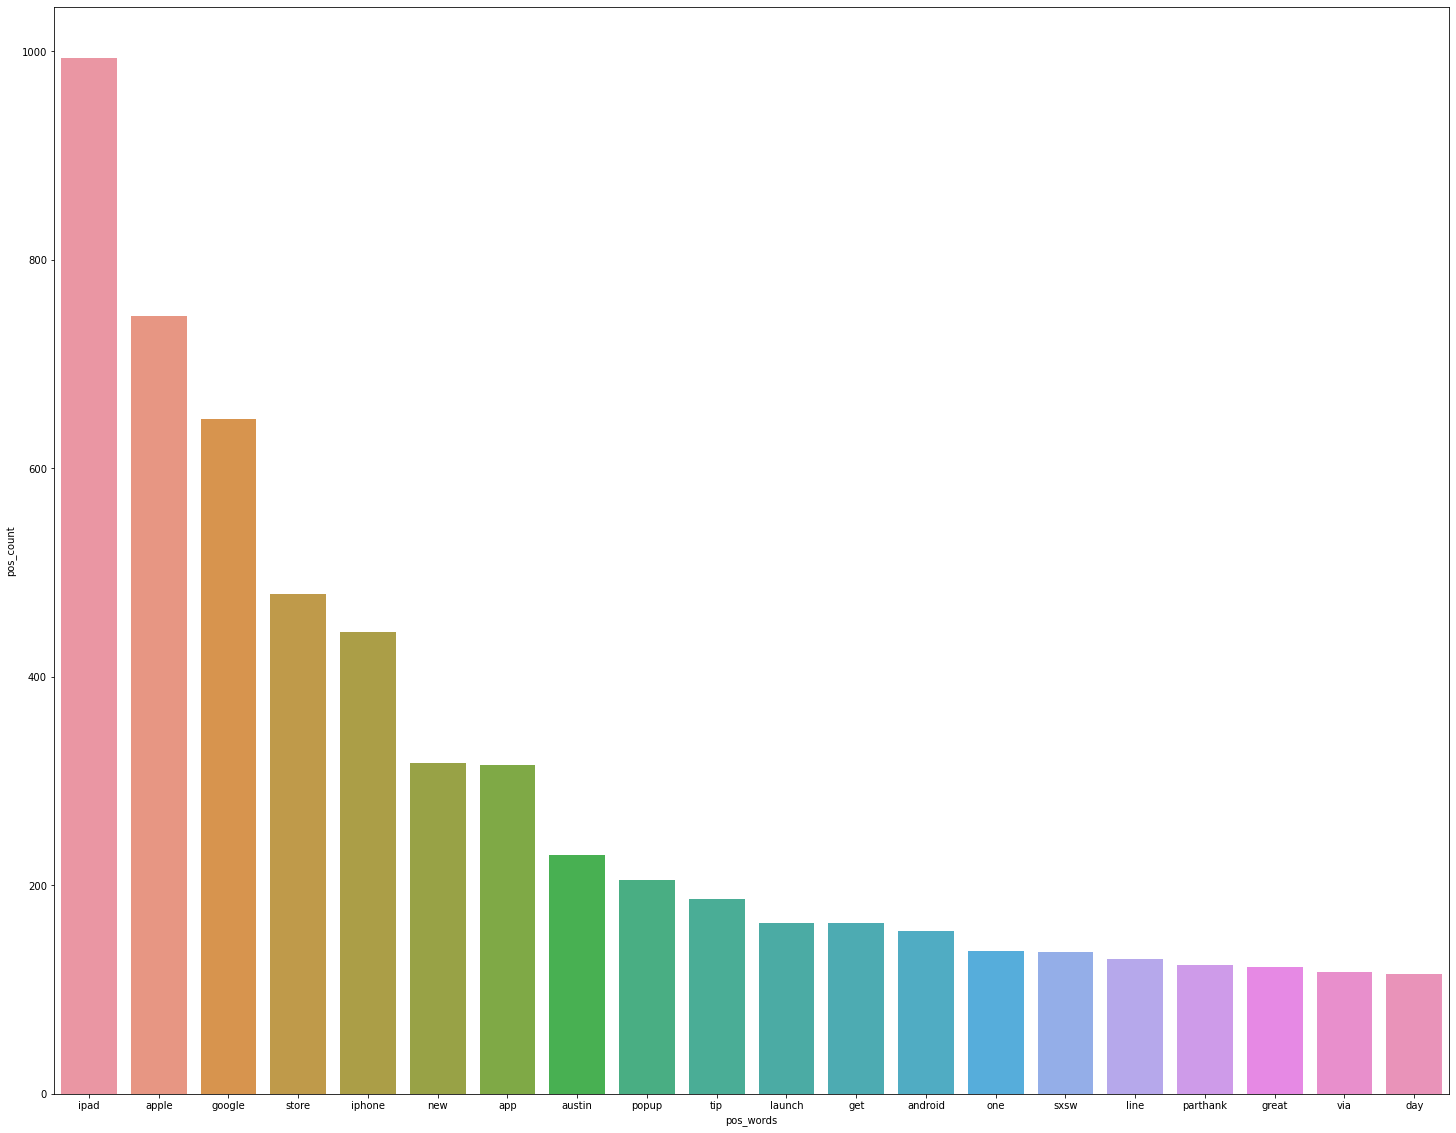

In [25]:
plt.figure(figsize=(25,20))
sns.barplot(x=pos_common_tweets['pos_words'], y=pos_common_tweets['pos_count'])

The postive sentiment shares many words in common with the negative sentiment, such as ipad, Apple, Google, new, and day. However, I can clearly see that the word great is unique to this ist of words. I can make the assumption that any tweat containing the word great should be labeled as positive, but there still isn't any substantial evidence as to why these tweets should be labeled as positive sentiment. 

In [26]:
# find most common words in neutral tweets
neu_tweet_tokens = neu_tweets['tweet_text'].apply(word_tokenize)
 
neu_tweet_tokens = neu_tweet_tokens.map(lambda x: [item for item in x if item not in stop_words])

neu_tweet_tokens = neu_tweet_tokens.map(lambda x: [lemmatizer.lemmatize(w) for w in x])

neu_tweet_tokens_list = list(itertools.chain(*neu_tweet_tokens))

neu_tweet_freq = FreqDist(neu_tweet_tokens_list)
neu_common_tweets = pd.DataFrame(neu_tweet_freq.most_common(20),
                             columns=['neu_words', 'neu_count'])

neu_common_tweets

,neu_words,neu_count
0,google,1496
1,ipad,1187
2,apple,1042
3,store,787
4,iphone,671
5,new,556
6,austin,461
7,launch,431
8,social,425
9,circle,420


<AxesSubplot:xlabel='neu_words', ylabel='neu_count'>

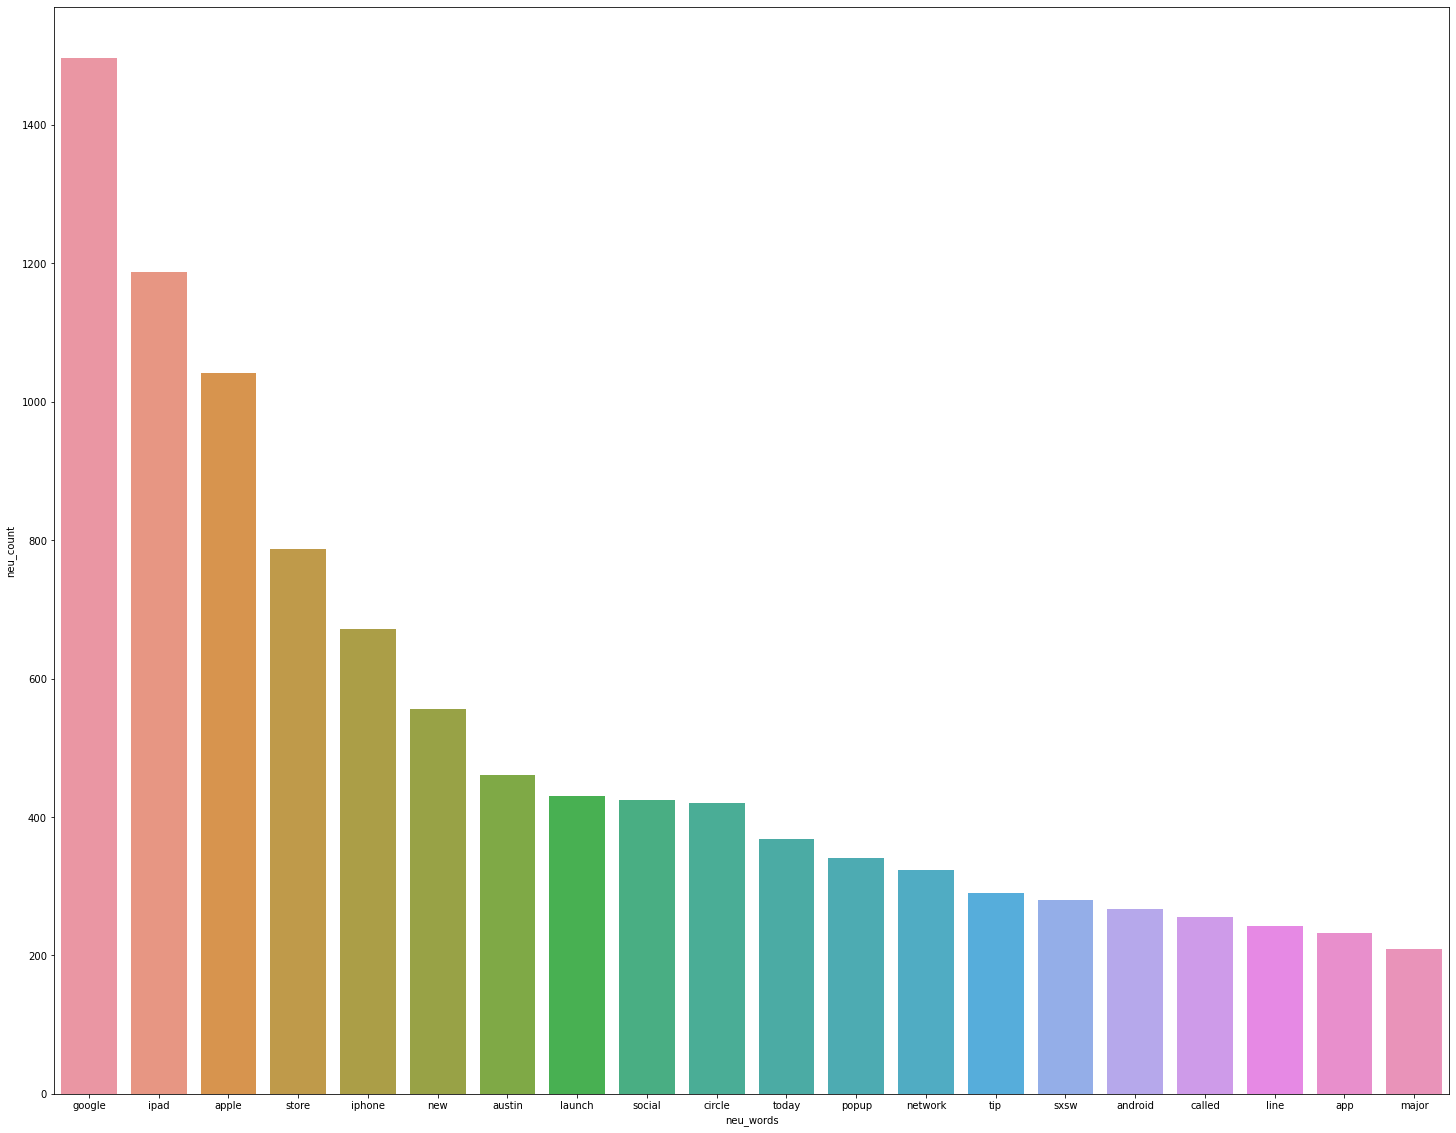

In [27]:
plt.figure(figsize=(25,20))
sns.barplot(x=neu_common_tweets['neu_words'], y=neu_common_tweets['neu_count'])

Neutral also shares many of the same words and doesn't provide much evidence as to why certain tweets may be labeled as neutral. Overall, all three methods looked at above do not provide much insight into what a tweets sentiment at a certain brand is labeled thus. However, there is a better way to visualize word data using Scattertext.

### Scatter Text

Scattertext is a tool that tries to determine the importance of words or phrases based upon the words sentiment category. In my case, I used the sentiments positive and negative. 

In [28]:
#tokenize tweets and create new df for scattering
token_df = pd.DataFrame({'tweet_tokens':tweet_tokens})
token_df.tweet_tokens = token_df.tweet_tokens.swifter.apply(lambda x: ' '.join(x))
scatter_df = pd.concat([token_df['tweet_tokens'], nlp_df[['brand', 'sentiment']]], axis=1)
scatter_df

,tweet_tokens,brand,sentiment
0,iphone hour tweeting austin dead need upgrade ...,apple,negative
1,know awesome ipadiphone app youll likely appre...,apple,positive
3,hope year festival crashy year iphone app,apple,negative
4,great stuff friday marissa mayer google tim or...,google,positive
5,new ipad apps communication showcased conference,apple,neutral
...,...,...,...
9087,yup third app yet im android suggestion carbon...,android,neutral
9088,ipad everyoure welcomehere,apple,positive
9090,google zeiger physician never reported potenti...,google,neutral
9091,verizon iphone customer complained time fell b...,apple,neutral


In [29]:
# tokenize text
scatter_df['parse'] = scatter_df.tweet_tokens.apply(st.whitespace_nlp_with_sentences)

# Build corpus
corpus = st.CorpusFromParsedDocuments(scatter_df, category_col='sentiment', parsed_col='parse'
                                     ).build().get_unigram_corpus()
                                     
# Reduce the number of phrases 
corpus = corpus.compact(st.AssociationCompactor(2000))

In [30]:
# Save as html in order to view in browser

html = st.produce_scattertext_explorer(
    corpus,
    category='positive', category_name='positive', not_category_name='negative',
    minimum_term_frequency=0, pmi_threshold_coefficient=0,
    width_in_pixels=1000, metadata=corpus.get_df()['brand'],
    transform=st.Scalers.dense_rank
    )
    
open('./tweets_sentiment.html', 'w').write(html)

1399866

In [31]:
# Do it again, ut this time for phrases

nlp = spacy.load('en_core_web_sm')

# Use spaCy to parse each document 
scatter_df = scatter_df.assign(parse=lambda data: data.tweet_tokens.apply(nlp))

# Create corpus
corpus = st.CorpusFromParsedDocuments(
    scatter_df,
    category_col='sentiment',
    parsed_col='parse',
    feats_from_spacy_doc=st.PyTextRankPhrases() # Add PyTextRank to the spaCy's pipeline
).build(
).compact(
    # Reduce the number of phrases displayed 
    st.AssociationCompactor(2000, use_non_text_features=True) 
)

C:\Users\paulv\Anaconda3\envs\learn-env\lib\site-packages\scattertext\termscoring\ScaledFScore.py:129: RuntimeWarning: invalid value encountered in true_divide
  precision = (cat_word_counts * 1. / (cat_word_counts + not_cat_word_counts))
C:\Users\paulv\Anaconda3\envs\learn-env\lib\site-packages\scattertext\termscoring\ScaledFScore.py:129: RuntimeWarning: invalid value encountered in true_divide
  precision = (cat_word_counts * 1. / (cat_word_counts + not_cat_word_counts))
C:\Users\paulv\Anaconda3\envs\learn-env\lib\site-packages\scattertext\termscoring\ScaledFScore.py:129: RuntimeWarning: invalid value encountered in true_divide
  precision = (cat_word_counts * 1. / (cat_word_counts + not_cat_word_counts))


In [32]:
# Let's look at how scatter scored sentiment for certain phrases
term_category_scores = corpus.get_metadata_freq_df('')
term_category_scores

,negative,positive,neutral
term,,,
upgrade plugin station,0.432853,0.000000,0.000000
hour,0.760494,2.785740,1.950700
awesome ipadiphone app,0.000000,0.447540,0.000000
free t,0.000000,0.347302,0.000000
design,0.169080,0.321582,0.355890
...,...,...,...
novus google parthank,0.000000,0.000000,0.800000
sunny tan,0.000000,0.606756,0.000000
mayer map google,0.000000,0.000000,1.131371


In [33]:
term_ranks = np.argsort(np.argsort(-term_category_scores, axis=0), axis=0) + 1

In [34]:
# Text displayed when clicked
metadata_descriptions = {
    term: '<br/>' + '<br/>'.join(
        '<b>%s</b> TextRank score rank: %s/%s' % (cat, term_ranks.loc[term, cat], corpus.get_num_metadata())
        for cat in corpus.get_categories())
    for term in corpus.get_metadata()
}

In [35]:
# Apply scores to text

category_specific_prominence = term_category_scores.apply(
    lambda r: r.positive if r.positive > r.negative else -r.negative,
    axis=1
)
category_specific_prominence

term
upgrade plugin station   -0.432853
hour                      2.785740
awesome ipadiphone app    0.447540
free t                    0.347302
design                    0.321582
                            ...   
novus google parthank    -0.000000
sunny tan                 0.606756
mayer map google         -0.000000
apple smart               0.894427
crowd austin              1.081747
Length: 2000, dtype: float64

In [36]:
# Save as html in order to view in browser
new_html = st.produce_scattertext_explorer(
    corpus,
    category='positive',
    not_category_name='negative',
    minimum_term_frequency=0,
    pmi_threshold_coefficient=0,
    width_in_pixels=1000,
    transform=st.dense_rank,
    metadata=corpus.get_df()['brand'],
    scores=category_specific_prominence,
    sort_by_dist=False,
    use_non_text_features=True,
    topic_model_term_lists={term: [term] for term in corpus.get_metadata()},
    topic_model_preview_size=0,
    metadata_descriptions=metadata_descriptions,
    use_full_doc=True
)

open('./tweets_sentiment_textrank.html', 'w').write(new_html)

2216302

## Vectorization

In order to create a model with text, I have to vectorize the string data in order for my model to treat the text as a numerical value that the computer can process. For my projects purposes I am going to try three methods of vectorization - Count Vectorizer, TF-IDF Vectorizer, and Doc2vec vectorizer.

### Count Vectorizer

The count vectorizer will allow me to convert text into a matrix of token counts. It returns the text as an integer count that represents the length of the all the vacubulary within the text. Basically, the vectors have a dimensionality equal to the size of our vocabulary. 

In [37]:
# Drop brand from df
clean_nlp_df = nlp_df.drop(['brand'], axis=1)

# Replace text with tokens
clean_nlp_df['tweet_text'] = [' '.join(map(str, l)) for l in tweet_tokens]

#Label encode brand and sentiment
le = preprocessing.LabelEncoder()
clean_nlp_df['sentiment'] = le.fit_transform(clean_nlp_df['sentiment'])

# Separate into X and y
cv_X = clean_nlp_df.tweet_text
cv_y = clean_nlp_df.sentiment

# Instantiate Count Vectorizer
cvec = CountVectorizer(ngram_range = (1,3))

# Create Training and Testing sets
cv_X_train, cv_X_test, cv_y_train, cv_y_test = train_test_split(cv_X, cv_y, test_size=0.20, random_state=42)

cv_X_train = cvec.fit_transform(cv_X_train)
cv_X_test = cvec.transform(cv_X_test)

### TF-IDF Vectorization

TF-IDF or Term Frequency Inverse Document Frequency is a method in which we can highlight the more unique words in the dataset. By taking the inverse, TF-IDF downscales words that appear a lot across the given tweets and focuses more on those that stand out. This is important because there is a lot more value in unique text. 

In [38]:
# Create new X and y values
tf_X = clean_nlp_df.tweet_text
tf_y = clean_nlp_df.sentiment

# Instantiate TF-IDF Vector
tfidf = TfidfVectorizer(max_features = 1000)

# Create Training and Testing sets
tf_X_train, tf_X_test, tf_y_train, tf_y_test = train_test_split(tf_X, tf_y, test_size=0.20, random_state=42)

tf_X_train = tfidf.fit_transform(tf_X_train)
tf_X_test = tfidf.transform(tf_X_test)

### Doc2vec

Doc2vec is a method in which representation vectors are created from the words in the provided text. It does this by not only vectorizing the words, but by also vectorizing each document. This is important because it provides representation for each unique document.

In [39]:
# function labels tweets for vectorization
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

labeled_tweets = add_label(tweet_tokens) 

labeled_tweets[:6]

C:\Users\paulv\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  """


[LabeledSentence(words=['iphone', 'hour', 'tweeting', 'austin', 'dead', 'need', 'upgrade', 'plugin', 'station'], tags=['tweet_0']),
 LabeledSentence(words=['know', 'awesome', 'ipadiphone', 'app', 'youll', 'likely', 'appreciate', 'design', 'also', 'giving', 'free', 't'], tags=['tweet_1']),
 LabeledSentence(words=['hope', 'year', 'festival', 'crashy', 'year', 'iphone', 'app'], tags=['tweet_3']),
 LabeledSentence(words=['great', 'stuff', 'friday', 'marissa', 'mayer', 'google', 'tim', 'oreilly', 'tech', 'booksconferences', 'matt', 'mullenweg', 'wordpress'], tags=['tweet_4']),
 LabeledSentence(words=['new', 'ipad', 'apps', 'communication', 'showcased', 'conference'], tags=['tweet_5']),
 LabeledSentence(words=['beautifully', 'smaand', 'simple', 'idea', 'wrote', 'ipad', 'app'], tags=['tweet_8'])]

In [40]:

%%time 
doc_model = Doc2Vec(dm=1, 
                    dm_mean=1, 
                    vector_size=200, 
                    window=5,                                 
                    negative=7, 
                    min_count=5,                                                                  
                    alpha=0.1,                                  
                    seed = 23, 
                                 ) 

doc_model.build_vocab([i for i in tqdm(labeled_tweets)])

doc_model.train(labeled_tweets, total_examples= len(clean_nlp_df['tweet_text']), epochs=15)

100%|██████████| 7305/7305 [00:00<00:00, 3655379.47it/s]


Wall time: 11.9 s


In [41]:
docvec_arrays = np.zeros((len(tweet_tokens), 200)) 
for i in range(len(clean_nlp_df['tweet_text'])):
    docvec_arrays[i,:] = doc_model.docvecs[i].reshape((1,200))    

docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

(7305, 200)

In [42]:
# Define X and y for the d2v models
doc_y = clean_nlp_df.sentiment
doc_X = docvec_df

# Perform train test split
doc_X_train, doc_X_test, doc_y_train, doc_y_test = train_test_split(doc_X, doc_y, test_size=0.25,
                                                    random_state=1)

## Models

For my models I will be using three different models - Multinomial Naive Bayes, Random Forest, and XGBoost. These models were picked based upon their usefullness with text data. I also wanted to test undersampling and oversampling techniques on my model since the data contains imbalances. At first I tested six undersampling and six oversampling, but to save time, I picked the best undersampling and oversampling techniques. These were SMOTE-NC and Random Undersampling.

Since the dataset is imbalanced, I will be using the f1 score as the overall measure of the dataset. Since I am als curious about the impact of the negative sentimet on the dataset, I will be looking at recall score. I think negative tweets are important for a business to look at because it provides a business with understanding as to why a consumer may not want to purchase their product or may have purchased their product, but is having issues with the product. The goal of a business should be to retain consumers, and by looking at the negative tweets a business may be able to reach out to that consumer in order to keep them as a customer. Recall will allow me to determine if my model is accurately representing the true negatives in my dataset.

### Multinomial Naive Bayes

I decided to use Multinomial Naive Bayes after researching models that would be useful on text dataset. Multinomial Nomial Bayes was picked since it works wel with both continuous and categorical datasets, and it is useful when it comes to working with vectorized features. 

#### Count Vectorizer models

In [46]:
# Base model
base_cv_mnb = MultinomialNB()
base_cv_mnb.fit(cv_X_train, cv_y_train)
base_cv_mnb_predicted = base_cv_mnb.predict(cv_X_test)

base_cv_mnb_f1 = f1_score(base_cv_mnb_predicted, cv_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(base_cv_mnb_f1*100)+'%')

print('\n')
print(classification_report(cv_y_test, base_cv_mnb_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 64.73%


              precision    recall  f1-score   support

    negative       0.49      0.16      0.24       108
     neutral       0.66      0.78      0.72       830
    positive       0.58      0.49      0.53       523

    accuracy                           0.63      1461
   macro avg       0.57      0.48      0.49      1461
weighted avg       0.62      0.63      0.61      1461



In [47]:
# Base model with SMOTE-NC
smtnc = SMOTENC([0], random_state=42, sampling_strategy='minority')
cv_smtnc_X_train, cv_smtnc_y_train = smtnc.fit_resample(cv_X_train, cv_y_train)

base_cv_smtnc_mnb = MultinomialNB()
base_cv_smtnc_mnb.fit(cv_smtnc_X_train, cv_smtnc_y_train)
base_cv_smtnc_mnb_predicted = base_cv_smtnc_mnb.predict(cv_X_test)

base_cv_smtnc_mnb_f1 = f1_score(base_cv_smtnc_mnb_predicted, cv_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(base_cv_smtnc_mnb_f1*100)+'%')
print('\n')
print(classification_report(cv_y_test, base_cv_smtnc_mnb_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 61.98%


              precision    recall  f1-score   support

    negative       0.32      0.44      0.37       108
     neutral       0.67      0.73      0.70       830
    positive       0.61      0.47      0.53       523

    accuracy                           0.62      1461
   macro avg       0.53      0.55      0.53      1461
weighted avg       0.62      0.62      0.61      1461



In [48]:
# Base model with Random Under Sampling
rus = RandomUnderSampler(random_state=42, sampling_strategy='not minority')
cv_rus_X_train, cv_rus_y_train = rus.fit_resample(cv_X_train, cv_y_train)

base_cv_rus_mnb = MultinomialNB()
base_cv_rus_mnb.fit(cv_rus_X_train, cv_rus_y_train)
base_cv_rus_mnb_predicted = base_cv_rus_mnb.predict(cv_X_test)

base_cv_rus_mnb_f1 = f1_score(base_cv_rus_mnb_predicted, cv_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(base_cv_rus_mnb_f1*100)+'%')
print('\n')
print(classification_report(cv_y_test, base_cv_rus_mnb_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 48.98%


              precision    recall  f1-score   support

    negative       0.23      0.67      0.34       108
     neutral       0.68      0.48      0.56       830
    positive       0.49      0.52      0.50       523

    accuracy                           0.51      1461
   macro avg       0.46      0.55      0.47      1461
weighted avg       0.58      0.51      0.52      1461



The base models for the CV MNB models are very interesting. I can see that the base model performed the best with an f1 score of 64.73%, but the model using Randomized Undersampling had the best recall score of negative tweets at 67 percent.

In [48]:
# MNB Parameter Grid
mnb_param_grid = {
    'alpha':[0, 1, 2, 3, 4, 5],
    'fit_prior': [True, False]
}

In [49]:
# Run gridsearch to determine best parameters for base MNB model

mnb_gs = GridSearchCV(
     MultinomialNB(),
     mnb_param_grid,
     cv = 3,
     n_jobs = -1)

cv_mnb_gs_results = mnb_gs.fit(cv_X_train, cv_y_train)

# Print best hyperparameters
cv_mnb_gs_results.best_estimator_

MultinomialNB(alpha=3)

In [50]:
# Tuned MNB model
cv_mnb = MultinomialNB(alpha=3)
cv_mnb.fit(cv_X_train, cv_y_train)
cv_mnb_predicted = cv_mnb.predict(cv_X_test)


cv_mnb_f1 = f1_score(cv_mnb_predicted, cv_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(cv_mnb_f1*100)+'%')
print('\n')
print(classification_report(cv_y_test, cv_mnb_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 68.45%


              precision    recall  f1-score   support

    negative       0.58      0.06      0.12       108
     neutral       0.65      0.88      0.74       830
    positive       0.65      0.40      0.49       523

    accuracy                           0.65      1461
   macro avg       0.63      0.45      0.45      1461
weighted avg       0.64      0.65      0.61      1461



In [51]:
cv_smtnc_mnb_gs_results = mnb_gs.fit(cv_smtnc_X_train, cv_smtnc_y_train)

# Print best hyperparameters
cv_smtnc_mnb_gs_results.best_estimator_

C:\Users\paulv\Anaconda3\envs\learn-env\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


MultinomialNB(alpha=0)

In [52]:
# Tuned MNB model with SMOTENC
cv_smtnc_mnb = MultinomialNB(alpha=7)
cv_smtnc_mnb.fit(cv_smtnc_X_train, cv_smtnc_y_train)
cv_smtnc_mnb_predicted = cv_smtnc_mnb.predict(cv_X_test)

cv_smtnc_mnb_f1 = f1_score(cv_smtnc_mnb_predicted, cv_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(cv_smtnc_mnb_f1*100)+'%')
print('\n')
print(classification_report(cv_y_test, cv_smtnc_mnb_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 63.00%


              precision    recall  f1-score   support

    negative       0.27      0.51      0.35       108
     neutral       0.64      0.83      0.72       830
    positive       0.75      0.25      0.38       523

    accuracy                           0.60      1461
   macro avg       0.55      0.53      0.48      1461
weighted avg       0.65      0.60      0.57      1461



In [53]:
cv_rus_gs_results = mnb_gs.fit(cv_rus_X_train, cv_rus_y_train)

# Print best hyperparameters
cv_mnb_gs_results.best_estimator_

MultinomialNB(alpha=1)

In [53]:
cv_rus_mnb = MultinomialNB(alpha=1)
cv_rus_mnb.fit(cv_rus_X_train, cv_rus_y_train)
cv_rus_mnb_predicted = cv_rus_mnb.predict(cv_X_test)

cv_rus_mnb_f1 = f1_score(cv_rus_mnb_predicted, cv_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(cv_rus_mnb_f1*100)+'%')
print('\n')
print(classification_report(cv_y_test, cv_rus_mnb_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 48.98%


              precision    recall  f1-score   support

    negative       0.23      0.67      0.34       108
     neutral       0.68      0.48      0.56       830
    positive       0.49      0.52      0.50       523

    accuracy                           0.51      1461
   macro avg       0.46      0.55      0.47      1461
weighted avg       0.58      0.51      0.52      1461



After fine tuning the models using CV, the base model's f1 score increased to 68%, however the recall score for negative sentiment did not. The Random Undersampling method remained effective at scoring negative sentiment appropriately. 

#### TF-IDF Models

In [55]:
# Base model
base_tfidf_mnb = MultinomialNB()
base_tfidf_mnb.fit(tf_X_train, tf_y_train)
base_tfidf_mnb_predicted = base_tfidf_mnb.predict(tf_X_test)

base_tfidf_mnb_f1 = f1_score(base_tfidf_mnb_predicted, tf_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(base_tfidf_mnb_f1*100)+'%')
print('\n')
print(classification_report(tf_y_test, base_tfidf_mnb_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 66.57%


              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       108
     neutral       0.64      0.86      0.73       830
    positive       0.58      0.38      0.46       523

    accuracy                           0.62      1461
   macro avg       0.40      0.41      0.40      1461
weighted avg       0.57      0.62      0.58      1461



C:\Users\paulv\Anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
# Base model with SMOTE-NC
tf_smtnc_X_train, tf_smtnc_y_train = smtnc.fit_resample(tf_X_train, tf_y_train)

base_tf_smtnc_mnb = MultinomialNB()
base_tf_smtnc_mnb.fit(tf_smtnc_X_train, tf_smtnc_y_train)
base_tf_smtnc_mnb_predicted = base_tf_smtnc_mnb.predict(tf_X_test)

base_tf_smtnc_mnb_f1 = f1_score(base_tf_smtnc_mnb_predicted, tf_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(base_tf_smtnc_mnb_f1*100)+'%')
print('\n')
print(classification_report(tf_y_test, base_tf_smtnc_mnb_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 55.16%


              precision    recall  f1-score   support

    negative       0.19      0.56      0.29       108
     neutral       0.66      0.71      0.69       830
    positive       0.61      0.30      0.40       523

    accuracy                           0.55      1461
   macro avg       0.49      0.52      0.46      1461
weighted avg       0.61      0.55      0.55      1461



In [57]:
# Base model with Random Under Sampling
tf_rus_X_train, tf_rus_y_train = rus.fit_resample(tf_X_train, tf_y_train)

base_tf_rus_mnb = MultinomialNB()
base_tf_rus_mnb.fit(tf_rus_X_train, tf_rus_y_train)
base_tf_rus_mnb_predicted = base_tf_rus_mnb.predict(tf_X_test)

base_tf_rus_mnb_f1 = f1_score(base_tf_rus_mnb_predicted, tf_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(base_tf_rus_mnb_f1*100)+'%')
print('\n')
print(classification_report(tf_y_test, base_tf_rus_mnb_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 45.73%


              precision    recall  f1-score   support

    negative       0.17      0.57      0.27       108
     neutral       0.67      0.47      0.55       830
    positive       0.48      0.48      0.48       523

    accuracy                           0.48      1461
   macro avg       0.44      0.51      0.43      1461
weighted avg       0.57      0.48      0.51      1461



The TF-IDF MNB base model that did not use over or undersampling techniques performed the best at 66.57% while the over- and undersampling models produced a similar recall score at .56 and .57 respectively. 

In [58]:
tf_mnb_gs_results = mnb_gs.fit(tf_X_train, tf_y_train)

# Print best hyperparameters
tf_mnb_gs_results.best_estimator_

MultinomialNB(alpha=2)

In [59]:
# Fine tuned base model
tfidf_mnb = MultinomialNB(alpha=2)
tfidf_mnb.fit(tf_X_train, tf_y_train)
tfidf_mnb_predicted = tfidf_mnb.predict(tf_X_test)

tfidf_mnb_f1 = f1_score(tfidf_mnb_predicted, tf_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(tfidf_mnb_f1*100)+'%')
print('\n')
print(classification_report(tf_y_test, tfidf_mnb_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 67.84%


              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       108
     neutral       0.63      0.89      0.74       830
    positive       0.61      0.34      0.44       523

    accuracy                           0.63      1461
   macro avg       0.41      0.41      0.39      1461
weighted avg       0.58      0.63      0.58      1461



C:\Users\paulv\Anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
tf_smtnc_mnb_gs_results = mnb_gs.fit(tf_smtnc_X_train, tf_smtnc_y_train)

# Print best hyperparameters
tf_smtnc_mnb_gs_results.best_estimator_

C:\Users\paulv\Anaconda3\envs\learn-env\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


MultinomialNB(alpha=0)

In [61]:
# Base model with SMOTE-NC
tf_smtnc_mnb = MultinomialNB(alpha=0)
tf_smtnc_mnb.fit(tf_smtnc_X_train, tf_smtnc_y_train)
tf_smtnc_mnb_predicted = tf_smtnc_mnb.predict(tf_X_test)

tf_smtnc_mnb_f1 = f1_score(tf_smtnc_mnb_predicted, tf_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(tf_smtnc_mnb_f1*100)+'%')
print('\n')
print(classification_report(tf_y_test, tf_smtnc_mnb_predicted, target_names=['negative', 'neutral', 'positive']))

C:\Users\paulv\Anaconda3\envs\learn-env\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


f1 Score: 56.71%


              precision    recall  f1-score   support

    negative       0.20      0.45      0.28       108
     neutral       0.66      0.72      0.69       830
    positive       0.59      0.36      0.44       523

    accuracy                           0.57      1461
   macro avg       0.48      0.51      0.47      1461
weighted avg       0.60      0.57      0.57      1461



In [62]:
tf_rus_mnb_gs_results = mnb_gs.fit(tf_rus_X_train, tf_rus_y_train)

# Print best hyperparameters
tf_rus_mnb_gs_results.best_estimator_

MultinomialNB(alpha=1)

In [63]:
# Tuned model with Random Under Sampling
tf_rus_mnb = MultinomialNB(alpha=1)
tf_rus_mnb.fit(tf_rus_X_train, tf_rus_y_train)
tf_rus_mnb_predicted = tf_rus_mnb.predict(tf_X_test)

tf_rus_mnb_f1 = f1_score(tf_rus_mnb_predicted, tf_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(tf_rus_mnb_f1*100)+'%')
print('\n')
print(classification_report(tf_y_test, tf_rus_mnb_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 45.73%


              precision    recall  f1-score   support

    negative       0.17      0.57      0.27       108
     neutral       0.67      0.47      0.55       830
    positive       0.48      0.48      0.48       523

    accuracy                           0.48      1461
   macro avg       0.44      0.51      0.43      1461
weighted avg       0.57      0.48      0.51      1461



The fine tuned MNB still outperforms the over- and undersampling techniques with an f1 score of 67%. The Random Undersampling technique retained the highest recall score of .57

#### Doc2vec Models

I had issues running the Doc2vec model due to MNBs inability to process negative values within the Doc2vec matrices. I was unable to correct this so proceeded to not incorporate it. In general, I had trouble with Doc2vec when it came to other models as well.

### Random Forest

Random Forest is a popular machine learning method in the data science field, and is a favorite of mine because of its simplicity. In order to keep things short (I went into detail on my previous project about Random Forest) Random Gorest is a classification algorithim that is made up of an ensemble of decision trees. This trees predictions are then used together in order to create a more accurate prediction. Random Forest is also useful for text sentiment analysis because it is able to handle the high dimensional noise of the dataset.

#### Count Vectorizer models

In [64]:
# Base model
base_cv_rf = RandomForestClassifier(random_state=42, class_weight='balanced')
base_cv_rf.fit(cv_X_train, cv_y_train)
base_cv_rf_predicted = base_cv_rf.predict(cv_X_test)

base_cv_rf_f1 = f1_score(base_cv_rf_predicted, cv_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(base_cv_rf_f1*100)+'%')

print('\n')
print(classification_report(cv_y_test, base_cv_rf_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 65.46%


              precision    recall  f1-score   support

    negative       0.57      0.19      0.29       108
     neutral       0.66      0.80      0.72       830
    positive       0.59      0.46      0.51       523

    accuracy                           0.64      1461
   macro avg       0.60      0.49      0.51      1461
weighted avg       0.63      0.64      0.62      1461



In [65]:
# Base model using SMOTE-NC
base_cv_smtnc_rf = RandomForestClassifier(random_state=42)
base_cv_smtnc_rf.fit(cv_smtnc_X_train, cv_smtnc_y_train)
base_cv_smtnc_rf_predicted = base_cv_smtnc_rf.predict(cv_X_test)

base_cv_smtnc_rf_f1 = f1_score(base_cv_smtnc_rf_predicted, cv_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(base_cv_smtnc_rf_f1*100)+'%')
print('\n')
print(classification_report(cv_y_test, base_cv_smtnc_rf_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 68.73%


              precision    recall  f1-score   support

    negative       0.66      0.19      0.30       108
     neutral       0.65      0.89      0.75       830
    positive       0.67      0.38      0.49       523

    accuracy                           0.66      1461
   macro avg       0.66      0.49      0.51      1461
weighted avg       0.66      0.66      0.62      1461



In [66]:
# Base model with Random Under Sampling
base_cv_rus_rf = RandomForestClassifier(random_state=42)
base_cv_rus_rf.fit(cv_rus_X_train, cv_rus_y_train)
base_cv_rus_rf_predicted = base_cv_rus_rf.predict(cv_X_test)

base_cv_rus_rf_f1 = f1_score(base_cv_rus_rf_predicted, cv_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(base_cv_rus_rf_f1*100)+'%')
print('\n')
print(classification_report(cv_y_test, base_cv_rus_rf_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 55.41%


              precision    recall  f1-score   support

    negative       0.26      0.43      0.32       108
     neutral       0.66      0.64      0.65       830
    positive       0.51      0.46      0.48       523

    accuracy                           0.56      1461
   macro avg       0.47      0.51      0.48      1461
weighted avg       0.57      0.56      0.56      1461



Overall, the SMOTE-NC model outperformed the other models with an f1 score of 68%, however Randomized Under Samling had the better recall score at 0.43 for negative sentiment.

In [45]:
# Prepare param_grib for Grid Search CV
criterion = ['gini', 'entropy']
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
max_depth.append(None)
min_samples_split = [2, 5, 10, 15, 20]
min_samples_leaf = [1, 2, 3, 4, 5, 6]

rf_clf = RandomForestClassifier()

rf_random_param = { 'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'n_estimators': n_estimators
        }

rf_rs = RandomizedSearchCV(estimator = rf_clf, 
                           param_distributions = rf_random_param, 
                           n_iter = 100,
                           cv = 3, 
                           verbose=2, 
                           random_state=11, 
                           n_jobs = -1)

cv_rf_rs_results = rf_rs.fit(cv_X_train, cv_y_train)

# Print best estimators
cv_rf_rs_results.best_estimator_

In [68]:
cv_rf = RandomForestClassifier(max_features='sqrt', min_samples_leaf=2,
                               min_samples_split=20, n_estimators=300, 
                               random_state=42, class_weight='balanced',
                               max_depth=350)

cv_rf.fit(cv_X_train, cv_y_train)
cv_rf_predicted = cv_rf.predict(cv_X_test)

cv_rf_f1 = f1_score(cv_rf_predicted, cv_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(cv_rf_f1*100)+'%')

print('\n')
print(classification_report(cv_y_test, cv_rf_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 61.55%


              precision    recall  f1-score   support

    negative       0.38      0.32      0.35       108
     neutral       0.69      0.68      0.68       830
    positive       0.55      0.57      0.56       523

    accuracy                           0.61      1461
   macro avg       0.54      0.53      0.53      1461
weighted avg       0.61      0.61      0.61      1461



In [69]:
cv_smtnc_rf_rs_results = rf_rs.fit(cv_smtnc_X_train, cv_smtnc_y_train)

# Print best estimators
cv_smtnc_rf_rs_results.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 25.5min finished


RandomForestClassifier(max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=20, n_estimators=300)

In [49]:
cv_smtnc_rf = RandomForestClassifier(max_features='sqrt', min_samples_leaf=2,
                               min_samples_split=20, n_estimators=300, 
                               random_state=42, max_depth=45)

cv_smtnc_rf.fit(cv_smtnc_X_train, cv_smtnc_y_train)
cv_smtnc_rf_predicted = cv_smtnc_rf.predict(cv_X_test)

cv_smtnc_rf_f1 = f1_score(cv_smtnc_rf_predicted, cv_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(cv_smtnc_rf_f1*100)+'%')

print('\n')
print(classification_report(cv_y_test, cv_smtnc_rf_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 71.34%


              precision    recall  f1-score   support

    negative       0.53      0.07      0.13       108
     neutral       0.58      0.99      0.73       830
    positive       0.91      0.06      0.11       523

    accuracy                           0.59      1461
   macro avg       0.68      0.38      0.33      1461
weighted avg       0.70      0.59      0.47      1461



In [71]:
cv_rus_rf_rs_results = rf_rs.fit(cv_rus_X_train, cv_rus_y_train)

# Print best estimators
cv_rus_rf_rs_results.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.8min finished


RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=20,
                       n_estimators=400)

In [72]:
cv_rus_rf = RandomForestClassifier(max_features='sqrt', min_samples_leaf=2,
                               min_samples_split=20, n_estimators=600, 
                               random_state=42, max_depth=50)

cv_rus_rf.fit(cv_rus_X_train, cv_rus_y_train)
cv_rus_rf_predicted = cv_rus_rf.predict(cv_X_test)

cv_rus_rf_f1 = f1_score(cv_rus_rf_predicted, cv_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(cv_rus_rf_f1*100)+'%')

print('\n')
print(classification_report(cv_y_test, cv_rus_rf_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 47.65%


              precision    recall  f1-score   support

    negative       0.20      0.51      0.29       108
     neutral       0.65      0.47      0.55       830
    positive       0.46      0.52      0.49       523

    accuracy                           0.49      1461
   macro avg       0.44      0.50      0.44      1461
weighted avg       0.55      0.49      0.51      1461



After fine tuning each model, the SMOTE-NC model score an f1 score of 71%, making it a stronger model to use when testing against new data. However, Randomized Under Samling still produced the better reall score at .51

#### TF-IDF Models

In [73]:
# Base model
base_tf_rf = RandomForestClassifier(random_state=42, class_weight='balanced')
base_tf_rf.fit(tf_X_train, tf_y_train)
base_tf_rf_predicted = base_tf_rf.predict(tf_X_test)

base_tf_rf_f1 = f1_score(base_tf_rf_predicted, tf_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(base_tf_rf_f1*100)+'%')

print('\n')
print(classification_report(tf_y_test, base_tf_rf_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 66.42%


              precision    recall  f1-score   support

    negative       0.49      0.19      0.27       108
     neutral       0.67      0.80      0.73       830
    positive       0.60      0.50      0.54       523

    accuracy                           0.65      1461
   macro avg       0.59      0.49      0.52      1461
weighted avg       0.63      0.65      0.63      1461



In [74]:
# Base model
base_tf_smtnc_rf = RandomForestClassifier(random_state=42)
base_tf_smtnc_rf.fit(tf_smtnc_X_train, tf_smtnc_y_train)
base_tf_smtnc_rf_predicted = base_tf_smtnc_rf.predict(tf_X_test)

base_tf_smtnc_rf_f1 = f1_score(base_tf_smtnc_rf_predicted, tf_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(base_tf_smtnc_rf_f1*100)+'%')

print('\n')
print(classification_report(tf_y_test, base_tf_smtnc_rf_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 66.90%


              precision    recall  f1-score   support

    negative       0.42      0.29      0.34       108
     neutral       0.67      0.83      0.74       830
    positive       0.65      0.45      0.53       523

    accuracy                           0.65      1461
   macro avg       0.58      0.52      0.54      1461
weighted avg       0.64      0.65      0.64      1461



In [75]:
# Base model
base_tf_rus_rf = RandomForestClassifier(random_state=42)
base_tf_rus_rf.fit(tf_rus_X_train, tf_rus_y_train)
base_tf_rus_rf_predicted = base_tf_rus_rf.predict(tf_X_test)

base_tf_rus_rf_f1 = f1_score(base_tf_rus_rf_predicted, tf_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(base_tf_rus_rf_f1*100)+'%')

print('\n')
print(classification_report(tf_y_test, base_tf_rus_rf_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 47.25%


              precision    recall  f1-score   support

    negative       0.18      0.52      0.26       108
     neutral       0.68      0.47      0.56       830
    positive       0.48      0.53      0.50       523

    accuracy                           0.49      1461
   macro avg       0.45      0.51      0.44      1461
weighted avg       0.57      0.49      0.52      1461



The RF TF-IDF base model and SMOTE-NC base model both scored an f1 score of 66% while the Randomized Undersampling model had a negative sentiment recall of .52.

In [76]:
tf_rf_rs_results = rf_rs.fit(tf_X_train, tf_y_train)

# Print best estimators
tf_rf_rs_results.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.1min finished


RandomForestClassifier(max_depth=100, max_features='sqrt', min_samples_split=10,
                       n_estimators=500)

In [133]:
tf_rf = RandomForestClassifier(max_features='sqrt',
                               min_samples_split=10, 
                               n_estimators=500, 
                               random_state=42, 
                               class_weight='balanced',
                               max_depth=200)

tf_rf.fit(tf_X_train, tf_y_train)
tf_rf_predicted = tf_rf.predict(tf_X_test)

tf_rf_f1 = f1_score(tf_rf_predicted, tf_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(tf_rf_f1*100)+'%')

print('\n')
print(classification_report(tf_y_test, tf_rf_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 65.59%


              precision    recall  f1-score   support

    negative       0.42      0.26      0.32       108
     neutral       0.69      0.77      0.72       830
    positive       0.60      0.54      0.57       523

    accuracy                           0.65      1461
   macro avg       0.57      0.52      0.54      1461
weighted avg       0.64      0.65      0.64      1461



In [78]:
tf_smtnc_rf_rs_results = rf_rs.fit(tf_smtnc_X_train, tf_smtnc_y_train)

# Print best estimators
tf_smtnc_rf_rs_results.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.2min finished


RandomForestClassifier(criterion='entropy', max_depth=90, n_estimators=300)

In [140]:
tf_smtnc_rf = RandomForestClassifier( n_estimators=300, 
                                      criterion='entropy',
                                      random_state=42, 
                                      max_depth=90)

tf_smtnc_rf.fit(tf_smtnc_X_train, tf_smtnc_y_train)
tf_smtnc_rf_predicted = tf_smtnc_rf.predict(tf_X_test)

tf_smtnc_rf_f1 = f1_score(tf_smtnc_rf_predicted, tf_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(tf_smtnc_rf_f1*100)+'%')

print('\n')
print(classification_report(tf_y_test, tf_smtnc_rf_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 66.65%


              precision    recall  f1-score   support

    negative       0.40      0.23      0.29       108
     neutral       0.66      0.83      0.74       830
    positive       0.64      0.43      0.52       523

    accuracy                           0.65      1461
   macro avg       0.57      0.50      0.52      1461
weighted avg       0.64      0.65      0.63      1461



In [80]:
tf_rus_rf_rs_results = rf_rs.fit(tf_rus_X_train, tf_rus_y_train)

# Print best estimators
tf_rus_rf_rs_results.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.1min finished


RandomForestClassifier(criterion='entropy', max_depth=60, min_samples_split=20,
                       n_estimators=500)

In [142]:
tf_rus_rf = RandomForestClassifier(criterion='entropy', 
                                   max_depth=60, 
                                   min_samples_split=20,
                                   n_estimators=500, 
                                   random_state=42)

tf_rus_rf.fit(tf_rus_X_train, tf_rus_y_train)
tf_rus_rf_predicted = tf_rus_rf.predict(tf_X_test)

tf_rus_rf_f1 = f1_score(tf_rus_rf_predicted, tf_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(tf_rus_rf_f1*100)+'%')

print('\n')
print(classification_report(tf_y_test, tf_rus_rf_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 46.03%


              precision    recall  f1-score   support

    negative       0.16      0.54      0.25       108
     neutral       0.68      0.46      0.55       830
    positive       0.49      0.51      0.50       523

    accuracy                           0.49      1461
   macro avg       0.45      0.50      0.43      1461
weighted avg       0.58      0.49      0.51      1461



The tuned models ended up not performing as well as their bae counterparts, but the SMOTE-NC model performed well with an f1 score of 66%. The Randomized Undersampling technique continued to have a better recall score when it came to negative sentiment.

#### Doc2vec Models

In [82]:
# Base model
base_doc_rf = RandomForestClassifier(random_state=42, class_weight='balanced')
base_doc_rf.fit(doc_X_train, doc_y_train)
base_doc_rf_predicted = base_doc_rf.predict(doc_X_test)

base_doc_rf_f1 = f1_score(base_doc_rf_predicted, doc_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(base_doc_rf_f1*100)+'%')

print('\n')
print(classification_report(doc_y_test, base_doc_rf_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 68.23%


              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       129
     neutral       0.59      0.95      0.73      1022
    positive       0.68      0.19      0.29       676

    accuracy                           0.60      1827
   macro avg       0.42      0.38      0.34      1827
weighted avg       0.58      0.60      0.52      1827



C:\Users\paulv\Anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
# Base SMOTE-NC model
doc_smtnc_X_train, doc_smtnc_y_train = smtnc.fit_resample(doc_X_train, doc_y_train)

base_doc_smtnc_rf = RandomForestClassifier(random_state=42)
base_doc_smtnc_rf.fit(doc_smtnc_X_train, doc_smtnc_y_train)
base_doc_smtnc_rf_predicted = base_doc_smtnc_rf.predict(doc_X_test)

base_doc_smtnc_rf_f1 = f1_score(base_doc_smtnc_rf_predicted, doc_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(base_doc_smtnc_rf_f1*100)+'%')

print('\n')
print(classification_report(doc_y_test, base_doc_smtnc_rf_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 63.12%


              precision    recall  f1-score   support

    negative       0.27      0.21      0.24       129
     neutral       0.61      0.86      0.71      1022
    positive       0.60      0.25      0.35       676

    accuracy                           0.59      1827
   macro avg       0.49      0.44      0.43      1827
weighted avg       0.58      0.59      0.55      1827



In [84]:
# Base RUS model
doc_rus_X_train, doc_rus_y_train = rus.fit_resample(doc_X_train, doc_y_train)

base_doc_rus_rf = RandomForestClassifier(random_state=42)
base_doc_rus_rf.fit(doc_rus_X_train, doc_rus_y_train)
base_doc_rus_rf_predicted = base_doc_rus_rf.predict(doc_X_test)

base_doc_rus_rf_f1 = f1_score(base_doc_rus_rf_predicted, doc_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(base_doc_rus_rf_f1*100)+'%')

print('\n')
print(classification_report(doc_y_test, base_doc_rus_rf_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 39.12%


              precision    recall  f1-score   support

    negative       0.13      0.57      0.21       129
     neutral       0.67      0.42      0.52      1022
    positive       0.46      0.41      0.44       676

    accuracy                           0.43      1827
   macro avg       0.42      0.47      0.39      1827
weighted avg       0.55      0.43      0.46      1827



The Doc2vec RF base model performed the best with an f1 score of 68% and the Randomized Undersampling technique had a recall score of .57 for negative sentiment.

In [85]:
doc_rf_rs_results = rf_rs.fit(doc_X_train, doc_y_train)

# Print best estimators
doc_rf_rs_results.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 37.7min finished


RandomForestClassifier(max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=15, n_estimators=300)

In [147]:
doc_rf = RandomForestClassifier(max_features='sqrt', 
                                min_samples_leaf=4,
                                min_samples_split=15, 
                                n_estimators=300,
                                random_state=42,)

doc_rf.fit(doc_X_train, doc_y_train)
doc_rf_predicted = doc_rf.predict(doc_X_test)

doc_rf_f1 = f1_score(doc_rf_predicted, doc_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(doc_rf_f1*100)+'%')

print('\n')
print(classification_report(doc_y_test, doc_rf_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 66.78%


              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       129
     neutral       0.60      0.92      0.72      1022
    positive       0.59      0.23      0.33       676

    accuracy                           0.60      1827
   macro avg       0.40      0.38      0.35      1827
weighted avg       0.56      0.60      0.53      1827



C:\Users\paulv\Anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
doc_smtnc_rf_rs_results = rf_rs.fit(doc_smtnc_X_train, doc_smtnc_y_train)

# Print best estimators
doc_smtnc_rf_rs_results.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 58.4min finished


RandomForestClassifier(max_depth=70, max_features='sqrt', min_samples_leaf=2,
                       n_estimators=900)

In [150]:
doc_smtnc_rf = RandomForestClassifier(max_depth=70, 
                                      max_features='sqrt', 
                                      min_samples_leaf=2,
                                      n_estimators=900, 
                                      random_state=42,)

doc_smtnc_rf.fit(doc_smtnc_X_train, doc_smtnc_y_train)
doc_smtnc_rf_predicted = doc_smtnc_rf.predict(doc_X_test)

doc_smtnc_rf_f1 = f1_score(doc_smtnc_rf_predicted, doc_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(doc_smtnc_rf_f1*100)+'%')

print('\n')
print(classification_report(doc_y_test, doc_smtnc_rf_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 64.02%


              precision    recall  f1-score   support

    negative       0.25      0.18      0.21       129
     neutral       0.59      0.89      0.71      1022
    positive       0.63      0.19      0.29       676

    accuracy                           0.58      1827
   macro avg       0.49      0.42      0.40      1827
weighted avg       0.58      0.58      0.52      1827



In [89]:
doc_rus_rf_rs_results = rf_rs.fit(doc_rus_X_train, doc_rus_y_train)

# Print best estimators
doc_rus_rf_rs_results.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.5min finished


RandomForestClassifier(criterion='entropy', max_depth=50, max_features='sqrt',
                       n_estimators=800)

In [151]:
doc_rus_rf = RandomForestClassifier(criterion='entropy', 
                                    max_depth=50, 
                                    max_features='sqrt',
                                    n_estimators=800, 
                                    random_state=42)

doc_rus_rf.fit(doc_rus_X_train, doc_rus_y_train)
doc_rus_rf_predicted = doc_rus_rf.predict(doc_X_test)

doc_rus_rf_f1 = f1_score(doc_rus_rf_predicted, doc_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(doc_rus_rf_f1*100)+'%')

print('\n')
print(classification_report(doc_y_test, doc_rus_rf_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 40.10%


              precision    recall  f1-score   support

    negative       0.14      0.63      0.22       129
     neutral       0.68      0.43      0.53      1022
    positive       0.48      0.41      0.44       676

    accuracy                           0.44      1827
   macro avg       0.43      0.49      0.40      1827
weighted avg       0.56      0.44      0.47      1827



As can be seen, the tuned models performed worse than the base models. The tuned base model performed the best at 66% and the tuned RUS model continued to have the best recall score at 0.63

### XGBoost

XGBoost is another popular machine learning model. It is a type of boosted tree algorithm that provides great speed and performance, and uses similar ideas to other ensemble techniques like Random Forest. However, unlike Random Forest, it builds off of the errors found in the previous model. 

#### Count Vectorizer models

In [91]:
# Base model
base_cv_xgb = xgb.XGBClassifier()
base_cv_xgb.fit(cv_X_train, cv_y_train)
base_cv_xgb_predicted = base_cv_xgb.predict(cv_X_test)

base_cv_xgb_f1 = f1_score(base_cv_xgb_predicted, cv_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(base_cv_xgb_f1*100)+'%')

print('\n')
print(classification_report(cv_y_test, base_cv_xgb_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 68.97%


              precision    recall  f1-score   support

    negative       0.67      0.02      0.04       108
     neutral       0.62      0.93      0.74       830
    positive       0.67      0.27      0.38       523

    accuracy                           0.63      1461
   macro avg       0.65      0.41      0.39      1461
weighted avg       0.64      0.63      0.56      1461



In [93]:
base_cv_smtnc_xgb = xgb.XGBClassifier()
base_cv_smtnc_xgb.fit(cv_smtnc_X_train, cv_smtnc_y_train)
base_cv_smtnc_xgb_predicted = base_cv_smtnc_xgb.predict(cv_X_test)

base_cv_smtnc_xgb_f1 = f1_score(base_cv_smtnc_xgb_predicted, cv_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(base_cv_smtnc_xgb_f1*100)+'%')
print('\n')
print(classification_report(cv_y_test, base_cv_smtnc_xgb_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 68.87%


              precision    recall  f1-score   support

    negative       0.50      0.05      0.08       108
     neutral       0.60      0.95      0.74       830
    positive       0.69      0.20      0.30       523

    accuracy                           0.61      1461
   macro avg       0.60      0.40      0.38      1461
weighted avg       0.63      0.61      0.53      1461



In [94]:
# Base model with Random Under Sampling
base_cv_rus_xgb = xgb.XGBClassifier()
base_cv_rus_xgb.fit(cv_rus_X_train, cv_rus_y_train)
base_cv_rus_xgb_predicted = base_cv_rus_xgb.predict(cv_X_test)

base_cv_rus_xgb_f1 = f1_score(base_cv_rus_xgb_predicted, cv_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(base_cv_rus_xgb_f1*100)+'%')
print('\n')
print(classification_report(cv_y_test, base_cv_rus_xgb_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 47.13%


              precision    recall  f1-score   support

    negative       0.17      0.47      0.25       108
     neutral       0.66      0.51      0.57       830
    positive       0.48      0.47      0.48       523

    accuracy                           0.49      1461
   macro avg       0.43      0.48      0.43      1461
weighted avg       0.56      0.49      0.51      1461



As can be seen, the base model and base SMOTE-NC models performed well with an f1 score of 68%. The RUS model had a negative sentiment of 0.47.

In [99]:
# Create XGBoost Classifier instance
xgb_clf = xgb.XGBClassifier()

# Create a grid of parameters. Depth should have the greatest effect when using XGBoost.
xgb_random_grid = { 'min_child_weight': [1, 5, 10],
                   'learning_rate': [0.1, 0.5, 0.9],
                   'subsample': [0.3, 0.5, 0.9],
                   'colsample_bytree': [0.3, 0.5, 0.8],
                   'gamma': [0.5, 1, 1.5, 2, 5],
                   'subsample': [0.6, 0.8, 1.0],
                   'colsample_bytree': [0.6, 0.8, 1.0],
                   'max_depth': [3, 5, 10, 15, 25, 30]
        }

# Use RandomizedSearchCV in order to determine best possible parameters to use for model.
xgb_rs = RandomizedSearchCV(estimator = xgb_clf, 
                           param_distributions = xgb_random_grid, 
                           n_iter = 100,
                           cv = 3, 
                           verbose=2, 
                           random_state=11, 
                           n_jobs = -1)


In [100]:
cv_xgb_rs_results = xgb_rs.fit(cv_X_train, cv_y_train)

# Print best estimators
cv_xgb_rs_results.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 106.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 267.1min finished


XGBClassifier(colsample_bytree=0.8, gamma=1.5, max_depth=25,
              objective='multi:softprob', subsample=0.6)

In [152]:
cv_xgb = xgb.XGBClassifier(colsample_bytree=0.8, gamma=1.5, max_depth=25,
              objective='multi:softprob', subsample=0.6)

cv_xgb.fit(cv_X_train, cv_y_train)
cv_xgb_predicted = cv_xgb.predict(cv_X_test)

cv_xgb_f1 = f1_score(cv_xgb_predicted, cv_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(cv_xgb_f1*100)+'%')

print('\n')
print(classification_report(cv_y_test, cv_xgb_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 67.64%


              precision    recall  f1-score   support

    negative       0.65      0.10      0.18       108
     neutral       0.65      0.85      0.74       830
    positive       0.62      0.44      0.51       523

    accuracy                           0.65      1461
   macro avg       0.64      0.46      0.48      1461
weighted avg       0.64      0.65      0.62      1461



In [102]:
# Fit training sets and run RandomizedSearchCV in order to determine best estimators for model.
cv_smtnc_xgb_rs_results = xgb_rs.fit(cv_smtnc_X_train, cv_smtnc_y_train)

# Print best estimators
cv_smtnc_xgb_rs_results.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 123.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 256.1min finished


XGBClassifier(colsample_bytree=0.6, gamma=1, max_depth=25,
              objective='multi:softprob', subsample=1.0)

In [153]:
cv_smtnc_xgb = xgb.XGBClassifier(colsample_bytree=0.6, gamma=1, max_depth=25,
              objective='multi:softprob', subsample=1.0)

cv_smtnc_xgb.fit(cv_smtnc_X_train, cv_smtnc_y_train)
cv_smtnc_xgb_predicted = cv_smtnc_xgb.predict(cv_X_test)

cv_smtnc_xgb_f1 = f1_score(cv_smtnc_xgb_predicted, cv_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(cv_smtnc_xgb_f1*100)+'%')

print('\n')
print(classification_report(cv_y_test, cv_smtnc_xgb_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 68.15%


              precision    recall  f1-score   support

    negative       0.64      0.15      0.24       108
     neutral       0.66      0.86      0.75       830
    positive       0.64      0.42      0.51       523

    accuracy                           0.65      1461
   macro avg       0.65      0.48      0.50      1461
weighted avg       0.65      0.65      0.62      1461



In [104]:
# Fit training sets and run RandomizedSearchCV in order to determine best estimators for model.
cv_rus_xgb_rs_results = xgb_rs.fit(cv_rus_X_train, cv_rus_y_train)

# Print best estimators
cv_rus_xgb_rs_results.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 81.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 170.8min finished


XGBClassifier(colsample_bytree=0.6, gamma=0.5, learning_rate=0.5, max_depth=10,
              objective='multi:softprob', subsample=0.8)

In [154]:
cv_rus_xgb = xgb.XGBClassifier(colsample_bytree=0.6, gamma=0.5, learning_rate=0.5, max_depth=10,
              objective='multi:softprob', subsample=0.8)

cv_rus_xgb.fit(cv_rus_X_train, cv_rus_y_train)
cv_rus_xgb_predicted = cv_rus_xgb.predict(cv_X_test)

cv_rus_xgb_f1 = f1_score(cv_rus_xgb_predicted, cv_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(cv_rus_xgb_f1*100)+'%')

print('\n')
print(classification_report(cv_y_test, cv_rus_xgb_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 47.47%


              precision    recall  f1-score   support

    negative       0.19      0.54      0.28       108
     neutral       0.67      0.49      0.56       830
    positive       0.47      0.49      0.48       523

    accuracy                           0.49      1461
   macro avg       0.44      0.51      0.44      1461
weighted avg       0.56      0.49      0.51      1461



When looking at the CV tuned boosted model, the SMOTE-NC model performed the best with a f1 score of 68%. RUS had the best negative recall at .54.

#### TF-IDF Models

In [106]:
# Base model
base_tf_xgb = xgb.XGBClassifier()
base_tf_xgb.fit(tf_X_train, tf_y_train)
base_tf_xgb_predicted = base_tf_xgb.predict(tf_X_test)

base_tf_xgb_f1 = f1_score(base_tf_xgb_predicted, tf_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(base_tf_xgb_f1*100)+'%')

print('\n')
print(classification_report(tf_y_test, base_tf_xgb_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 69.54%


              precision    recall  f1-score   support

    negative       0.50      0.01      0.02       108
     neutral       0.62      0.93      0.75       830
    positive       0.70      0.28      0.40       523

    accuracy                           0.63      1461
   macro avg       0.61      0.41      0.39      1461
weighted avg       0.64      0.63      0.57      1461



In [107]:
# Base model
base_tf_smtnc_xgb = xgb.XGBClassifier()
base_tf_smtnc_xgb.fit(tf_smtnc_X_train, tf_smtnc_y_train)
base_tf_smtnc_xgb_predicted = base_tf_smtnc_xgb.predict(tf_X_test)

base_tf_smtnc_xgb_f1 = f1_score(base_tf_smtnc_xgb_predicted, tf_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(base_tf_smtnc_xgb_f1*100)+'%')

print('\n')
print(classification_report(tf_y_test, base_tf_smtnc_xgb_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 64.88%


              precision    recall  f1-score   support

    negative       0.18      0.16      0.17       108
     neutral       0.61      0.90      0.73       830
    positive       0.71      0.19      0.30       523

    accuracy                           0.59      1461
   macro avg       0.50      0.41      0.40      1461
weighted avg       0.61      0.59      0.53      1461



In [108]:
# Base model
base_tf_rus_xgb = xgb.XGBClassifier()
base_tf_rus_xgb.fit(tf_rus_X_train, tf_rus_y_train)
base_tf_rus_xgb_predicted = base_tf_rus_xgb.predict(tf_X_test)

base_tf_rus_xgb_f1 = f1_score(base_tf_rus_xgb_predicted, tf_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(base_tf_rus_xgb_f1*100)+'%')

print('\n')
print(classification_report(tf_y_test, base_tf_rus_xgb_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 47.01%


              precision    recall  f1-score   support

    negative       0.16      0.49      0.24       108
     neutral       0.67      0.50      0.57       830
    positive       0.50      0.50      0.50       523

    accuracy                           0.49      1461
   macro avg       0.44      0.49      0.44      1461
weighted avg       0.57      0.49      0.52      1461



The base TF-IDF model outperformed the other models with an f1 score of 69% The RUS TF-IDF model has a recall of .49 for negative sentiment.

In [109]:
tf_xgb_rs_results = xgb_rs.fit(tf_X_train, tf_y_train)

# Print best estimators
tf_xgb_rs_results.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.7min finished


XGBClassifier(colsample_bytree=0.6, gamma=1, max_depth=25,
              objective='multi:softprob', subsample=1.0)

In [155]:
tf_xgb = xgb.XGBClassifier(colsample_bytree=0.6, gamma=1, max_depth=25,
              objective='multi:softprob', subsample=1.0)

tf_xgb.fit(tf_X_train, tf_y_train)
tf_xgb_predicted = tf_xgb.predict(tf_X_test)

tf_xgb_f1 = f1_score(tf_xgb_predicted, tf_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(tf_xgb_f1*100)+'%')

print('\n')
print(classification_report(tf_y_test, tf_xgb_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 68.14%


              precision    recall  f1-score   support

    negative       0.48      0.11      0.18       108
     neutral       0.66      0.85      0.75       830
    positive       0.64      0.46      0.53       523

    accuracy                           0.65      1461
   macro avg       0.59      0.47      0.49      1461
weighted avg       0.64      0.65      0.63      1461



In [111]:
# Fit training sets and run RandomizedSearchCV in order to determine best estimators for model.
tf_smtnc_xgb_rs_results = xgb_rs.fit(tf_smtnc_X_train, tf_smtnc_y_train)

# Print best estimators
tf_smtnc_xgb_rs_results.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 10.7min finished


XGBClassifier(colsample_bytree=0.6, gamma=1, max_depth=25,
              objective='multi:softprob', subsample=1.0)

In [156]:
tf_smtnc_xgb = xgb.XGBClassifier(colsample_bytree=0.6, gamma=1, max_depth=25,
              objective='multi:softprob', subsample=1.0)

tf_smtnc_xgb.fit(tf_smtnc_X_train, tf_smtnc_y_train)
tf_smtnc_xgb_predicted = tf_smtnc_xgb.predict(tf_X_test)

tf_smtnc_xgb_f1 = f1_score(tf_smtnc_xgb_predicted, tf_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(tf_smtnc_xgb_f1*100)+'%')

print('\n')
print(classification_report(tf_y_test, tf_smtnc_xgb_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 66.55%


              precision    recall  f1-score   support

    negative       0.39      0.20      0.27       108
     neutral       0.66      0.83      0.74       830
    positive       0.63      0.44      0.52       523

    accuracy                           0.65      1461
   macro avg       0.56      0.49      0.51      1461
weighted avg       0.63      0.65      0.63      1461



In [113]:
# Fit training sets and run RandomizedSearchCV in order to determine best estimators for model.
tf_rus_xgb_rs_results = xgb_rs.fit(tf_rus_X_train, tf_rus_y_train)

# Print best estimators
tf_rus_xgb_rs_results.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.2min finished


XGBClassifier(colsample_bytree=0.8, gamma=1, learning_rate=0.5, max_depth=25,
              objective='multi:softprob', subsample=1.0)

In [157]:
tf_rus_xgb = xgb.XGBClassifier(colsample_bytree=0.8, gamma=1, learning_rate=0.5, max_depth=25,
              objective='multi:softprob', subsample=1.0)

tf_rus_xgb.fit(tf_rus_X_train, tf_rus_y_train)
tf_rus_xgb_predicted = tf_rus_xgb.predict(tf_X_test)

tf_rus_xgb_f1 = f1_score(tf_rus_xgb_predicted, tf_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(tf_rus_xgb_f1*100)+'%')

print('\n')
print(classification_report(tf_y_test, tf_rus_xgb_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 45.63%


              precision    recall  f1-score   support

    negative       0.16      0.53      0.25       108
     neutral       0.66      0.48      0.56       830
    positive       0.49      0.47      0.48       523

    accuracy                           0.48      1461
   macro avg       0.44      0.49      0.43      1461
weighted avg       0.56      0.48      0.51      1461



For the tuned TF-IDF Boosted models, the tuned base model perfored the best with a score of 68%. RUS had a negative sentiment of .53

#### Doc2vec Models

I had issues running the under- and oversamling methods on this dataset due to the fact that the columns were being relabled. Therefore they were left out and the model that was not oversampled or undersampled was used.

In [115]:
# Base model
base_doc_xgb = xgb.XGBClassifier()
base_doc_xgb.fit(doc_X_train, doc_y_train)
base_doc_xgb_predicted = base_doc_xgb.predict(doc_X_test)

base_doc_xgb_f1 = f1_score(base_doc_xgb_predicted, doc_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(base_doc_xgb_f1*100)+'%')

print('\n')
print(classification_report(doc_y_test, base_doc_xgb_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 64.72%


              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       129
     neutral       0.60      0.88      0.71      1022
    positive       0.54      0.25      0.34       676

    accuracy                           0.59      1827
   macro avg       0.38      0.38      0.35      1827
weighted avg       0.53      0.59      0.52      1827



In [123]:
doc_xgb_rs_results = xgb_rs.fit(doc_X_train, doc_y_train)

# Print best estimators
doc_xgb_rs_results.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 33.4min finished


XGBClassifier(colsample_bytree=0.6, gamma=1, max_depth=25,
              objective='multi:softprob', subsample=1.0)

In [158]:
doc_xgb = xgb.XGBClassifier(colsample_bytree=0.6, gamma=1, max_depth=25,
              objective='multi:softprob', subsample=1.0)

doc_xgb.fit(doc_X_train, doc_y_train)
doc_xgb_predicted = doc_xgb.predict(doc_X_test)

doc_xgb_f1 = f1_score(doc_xgb_predicted, doc_y_test, average='weighted')

print('f1 Score:', '{:04.2f}'.format(doc_xgb_f1*100)+'%')

print('\n')
print(classification_report(doc_y_test, doc_xgb_predicted, target_names=['negative', 'neutral', 'positive']))

f1 Score: 65.39%


              precision    recall  f1-score   support

    negative       0.67      0.02      0.03       129
     neutral       0.62      0.86      0.72      1022
    positive       0.57      0.34      0.43       676

    accuracy                           0.61      1827
   macro avg       0.62      0.41      0.39      1827
weighted avg       0.60      0.61      0.56      1827



Compared to other models this model did poorly with an f1 score 64% that went to 65%

### Summary 

Overall, NLP was a huge learning curb for me that required patience and a lot of resarch. The methods I displayed here were not perfect and still need fine tuning. I still need to grasp the power of Doc2vec and figure out how to create stonger models for these types of classifications. But, the summary section is for the results so let's take a look at them.

* Best overall model - Count Vectorized SMOTE-NC Random Forest model with an F1 score of 71%
* Model with best Negative sentiment recall - Count Vectorized Randomized Under Sampling MNB model with 67% recall score

The following are confusion matrixes of both models

None


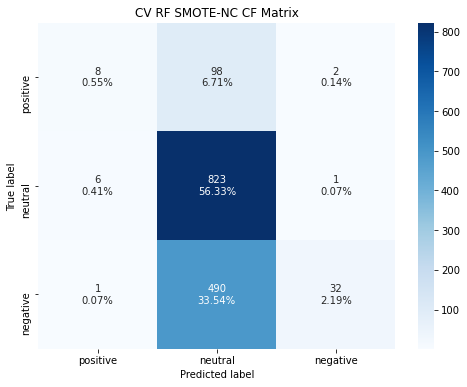

In [50]:
cv_smtnc_rf_matrix = confusion_matrix(cv_y_test, cv_smtnc_rf_predicted)
matrix_labels = ['positive', 'neutral', 'negative']
print(make_confusion_matrix(cv_smtnc_rf_matrix, figsize=(8,6), cbar=True, categories=matrix_labels, sum_stats=False, title='CV RF SMOTE-NC CF Matrix'))

In [51]:
print(classification_report(cv_y_test, cv_smtnc_rf_predicted, target_names=['negative', 'neutral', 'positive']))

              precision    recall  f1-score   support

    negative       0.53      0.07      0.13       108
     neutral       0.58      0.99      0.73       830
    positive       0.91      0.06      0.11       523

    accuracy                           0.59      1461
   macro avg       0.68      0.38      0.33      1461
weighted avg       0.70      0.59      0.47      1461



The Count Vectorized Random Forest model using SMOTE-NC was the best model that I was able to produce. Since the dataset was imbalanced I used the f1 score over the accuracy score in order to determine which model the data would run best on. The f1 score for this model was .7134 or 71.34%. Since the f1 score is the harmonic mean between the precision and recall score the higer the f1 score is the better our overall precision and recall scores are. In other words, this model is able to accuartely determine a tweets sentiment 71% of the time. 

The one main issue about this model is that it doesn't really determine recall of negative values well (True negatives). As can be seen from the classification report above, recall for negative values is only 0.07 and the overall f1 score is very low at 0.13. This poses an issue for my question regarding negative tweets since it is regarding most negative tweets as neutral.

None


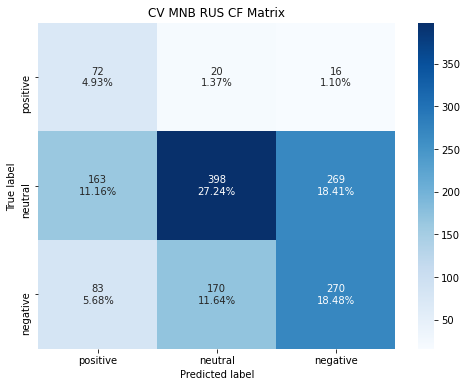

In [54]:
cv_rus_mnb_matrix = confusion_matrix(cv_y_test, cv_rus_mnb_predicted)
matrix_labels = ['positive', 'neutral', 'negative']
print(make_confusion_matrix(cv_rus_mnb_matrix, figsize=(8,6), cbar=True, categories=matrix_labels, sum_stats=False, title='CV MNB RUS CF Matrix'))

In [55]:
print(classification_report(cv_y_test, cv_rus_mnb_predicted, target_names=['negative', 'neutral', 'positive']))

              precision    recall  f1-score   support

    negative       0.23      0.67      0.34       108
     neutral       0.68      0.48      0.56       830
    positive       0.49      0.52      0.50       523

    accuracy                           0.51      1461
   macro avg       0.46      0.55      0.47      1461
weighted avg       0.58      0.51      0.52      1461



Throughout all of the various models run, one thing remained constant - Thos models that were resampled using Randomized Undersampling always produced the better recall scores for the negative sentiment class. Even though the f1 score for these models always faired worse, with this one only scoring .4898, it still managed to get a recall score of 0.67. Further investigation is definitely needed into this model and dataset in order to determine if a Randomized Undersampling model could produce a good f1 score with a good recall score in order for it to be a better trusted model.

### Further Research and Takeaways

This project was a learning experience for me and my first attempt at classifying data using NLP. In the future I would love to work with a dataset that is a little larger and a lot more exciting. I do think the large dimensionality may have created isues in this dataset, and I would like to try and add more noise to the dataset by converting the dataset to anothr language and then back to english to see if that helps to produce a better model. Overall, working with NLP helped me in understanding how to work with text data in an entirely new way and forced me to try new techniques such as undersampling and oversampling techniques. In the future I would also like to try and build a neural network for these types of models. I feel that a well produced neural network could halp in creating better overal models.